# BoomBike Sharing Case Study

## Introduction

This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. You will need to submit a Jupyter notebook for the same. 

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## DataSet

 The dataset is provided in a CSV file named "day.csv", and the corresponding data dictionary is available in "datadictionary.txt".

## Preliminary Wrangling

In [315]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
import piplite
%pip install seaborn
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Gathering

In [316]:
df=pd.read_csv('day.csv')

In [317]:
# high-level overview of data shape and composition
print("Number of Rows in day.csv : ",df.shape[0],"\nNumber of columns in day.csv : ",df.shape[1])

Number of Rows in day.csv :  730 
Number of columns in day.csv :  16


In [318]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB
None


In [319]:
print("\n DataSet : Day.csv \n")
df.head(1)


 DataSet : Day.csv 



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985


In [320]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Dictionary [link](https://drive.google.com/file/d/1x4Vi_FF0DEmTN1Cf6BnPHUuQP9p0s0Pz/view?usp=sharing)

In [321]:
# :Attribute Information (in order):
#    - instant record index
#	 - dteday   date
#	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
#	- yr : year (0: 2018, 1:2019)
#	- mnth : month ( 1 to 12)
#	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
#	- weekday : day of the week
#	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
#	+ weathersit : 
#		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#	- temp : temperature in Celsius
#	- atemp: feeling temperature in Celsius
#	- hum: humidity
#	- windspeed: wind speed
#	- casual: count of casual users
#	- registered: count of registered users
#	- cnt: count of total rental bikes including both casual and registered

## Observation

The dataset comprises roughly 730 bike sharing records and encompasses about 16 columns, which include bike sharing records for two years. Furthermore, the data dictionary contains 16 entries.

# Assessing

In [322]:
# Check duplicated value
display(HTML(f"Number of duplicated values in the dataset : {df.duplicated().sum()}"))

In [323]:
# Check null value for each column
null_cols = df.columns[df.isnull().all(axis=0)].tolist()

print(f"List of columns with NULL's : \n\n {null_cols} \n")
print(f"Count of columns having all NULL values : {len(null_cols)}")

List of columns with NULL's : 

 [] 

Count of columns having all NULL values : 0


In [324]:
# Find the uniqueness of a column in data frame

uniq_list = df.columns[(df.nunique() == 1)].tolist()
print("List of columns that have same value for all records : \n\n", uniq_list )
print("\nCount of columns that have same value for all records : ", len(uniq_list) )

List of columns that have same value for all records : 

 []

Count of columns that have same value for all records :  0


In [325]:
# Function that lists the categorical_values in a column
def categorical_values(df,column_list):
    for index, column in enumerate(column_list):
         display(HTML(f"{index+1} .Categorical column \"{column}\" and their values in the Day.csv"))
         value_counts_df = df[column].value_counts().reset_index()
         value_counts_df.columns = ['Value', 'Count']
         display(HTML(value_counts_df.to_html(index=False)))

# columns that have Categorical variables in the dataset
column_list = ['season','yr','holiday','workingday','weathersit','weekday','mnth']
categorical_values(df,column_list)

Value,Count
3,188
2,184
1,180
4,178


Value,Count
0,365
1,365


Value,Count
0,709
1,21


Value,Count
1,499
0,231


Value,Count
1,463
2,246
3,21


Value,Count
6,105
0,105
1,105
2,104
4,104
5,104
3,103


Value,Count
1,62
3,62
5,62
7,62
8,62
10,62
12,62
4,60
6,60
9,60


## Observation

1. The dataset does not contain any duplicate rows.
2. The dataset does not have any columns have values.
3. No Column has the same value across all the records.
4. The dataset comprises approximately 7 categorical variables: 'season','yr','holiday','workingday','weathersit','weekday' and 'mnth'

# Cleaning

1) Remove the Identity Column.
2) Remove the dteday column since all its derived columns are already present.

In [326]:
# Creating a copy of the dataset to preserve the original data
df_clean = df.copy()
print("Creating a copy of the dataset to preserve the orignal data \nNew dataframe : df_clean")

Creating a copy of the dataset to preserve the orignal data 
New dataframe : df_clean


In [327]:
# Display the dimensions of the copied DataFrame (number of rows, number of columns)
print("Number of Rows in day.csv : ",df_clean.shape[0],"\nNumber of columns in day.csv : ",df_clean.shape[1])

Number of Rows in day.csv :  730 
Number of columns in day.csv :  16


##### Define

1) Remove the Identity Column since dataframe are already indexed

In [328]:
df_clean = df_clean.drop(['instant'],axis=1)

##### Test

In [329]:
df_clean.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Define

2) Remove the dteday column since all its derived columns are already present.

In [330]:
df_clean = df_clean.drop(['dteday'],axis=1)

##### Define

4) Remove the registered column since this column will not help in data modelling.

In [331]:
df_clean = df_clean.drop(['registered'],axis=1)

##### Test

In [332]:
df_clean.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1600


##### Define

5) Remove the casual bikers column since this column will not help in data modelling.

In [333]:
df_clean = df_clean.drop(['casual'],axis=1)

##### Test

In [334]:
df_clean.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Define

6) Rename the columns for clarity by using full terms instead of abbreviations.

### Code

In [335]:
# Rename columns for clarity by replacing abbreviations with full terms.
new_mapping = {'yr': 'year',
               'mnth': 'month',
               'hum': 'humidity',
               'temp':'temperature',
               'atemp': 'feeling_temperature',
               'cnt':'total_count',
               'weathersit':'weather_condition',
               'workingday':'is_workingday',
               'holiday':'is_holiday'
              }

print("Renaming columns for clarity by replacing abbreviations with full terms.")
df_clean = df_clean.rename(columns=new_mapping)

Renaming columns for clarity by replacing abbreviations with full terms.


## Test

In [336]:
print(df_clean.columns)

Index(['season', 'year', 'month', 'is_holiday', 'weekday', 'is_workingday',
       'weather_condition', 'temperature', 'feeling_temperature', 'humidity',
       'windspeed', 'total_count'],
      dtype='object')


## Define

7) Replace the column categorical values with meaningful values as defined in the data dictionary

## Code

In [337]:
print("Replacing categorical data with more meaningful labels:\n")

# Replace numeric season values with corresponding labels
df_clean['season'].replace({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}, inplace=True)
print("1. Replaced season values.")

# Replace weather_condition values with descriptive categories
df_clean['weather_condition'].replace({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'}, inplace=True)
print("2. Replaced weather_condition values.")

# Replace numeric month values with corresponding labels
df_clean['month'].replace({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}, inplace=True)
print("3. Replaced month values.")

# Replace weekday values with corresponding day names
df_clean['weekday'].replace({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}, inplace=True)
print("4. Replaced weekday values.")

# Replace year values with corresponding years
df_clean['year'].replace({0: '2018', 1: '2019'}, inplace=True)
print("5. Replaced year values.")

# Replace is_holiday values with True or False
df_clean['is_holiday'].replace({0: 'False', 1: 'True'}, inplace=True)
print("6. Replaced is_holiday values.")

# Replace year values with True or False
df_clean['is_workingday'].replace({0: 'False', 1: 'True'}, inplace=True)
print("7. Replaced is_workingday values.")

Replacing categorical data with more meaningful labels:

1. Replaced season values.
2. Replaced weather_condition values.
3. Replaced month values.
4. Replaced weekday values.
5. Replaced year values.
6. Replaced is_holiday values.
7. Replaced is_workingday values.


## Test

In [338]:
column_list = ['season', 'weather_condition', 'month', 'weekday', 'year']
for i in column_list:
    print('Replaced values of categorical column :- ',i)
    print(df_clean[i].value_counts())

Replaced values of categorical column :-  season
Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64
Replaced values of categorical column :-  weather_condition
Clear                463
Mist & Cloudy        246
Light Snow & Rain     21
Name: weather_condition, dtype: int64
Replaced values of categorical column :-  month
January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: month, dtype: int64
Replaced values of categorical column :-  weekday
Saturday     105
Sunday       105
Monday       105
Tuesday      104
Thursday     104
Friday       104
Wednesday    103
Name: weekday, dtype: int64
Replaced values of categorical column :-  year
2018    365
2019    365
Name: year, dtype: int64


In [339]:
# Treating outliers
# Plots boxplots to examine outliers in the specified columns of the given dataframe.
def outlier_plot(dataframe, column_list):
    # Define color palette
    color_palette = ['skyblue', 'salmon', 'lightgreen', 'orchid', 'goldenrod', 'cornflowerblue','red']

    # Iterate over each column in the list
    for index, value in enumerate(column_list):
        # Define title for the subplot
        title_name = f"Outlier Examination for {value} column"

        # Create subplot
        plt.subplot(3, 3, index+1)
        plt.subplots_adjust(hspace=0.4, wspace=0.4)

        # Plot boxplot
        dataframe[value].plot(figsize=(12, 8), kind='box', color=color_palette[index])

        # Set title and font size
        plt.title(title_name, fontsize=12)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

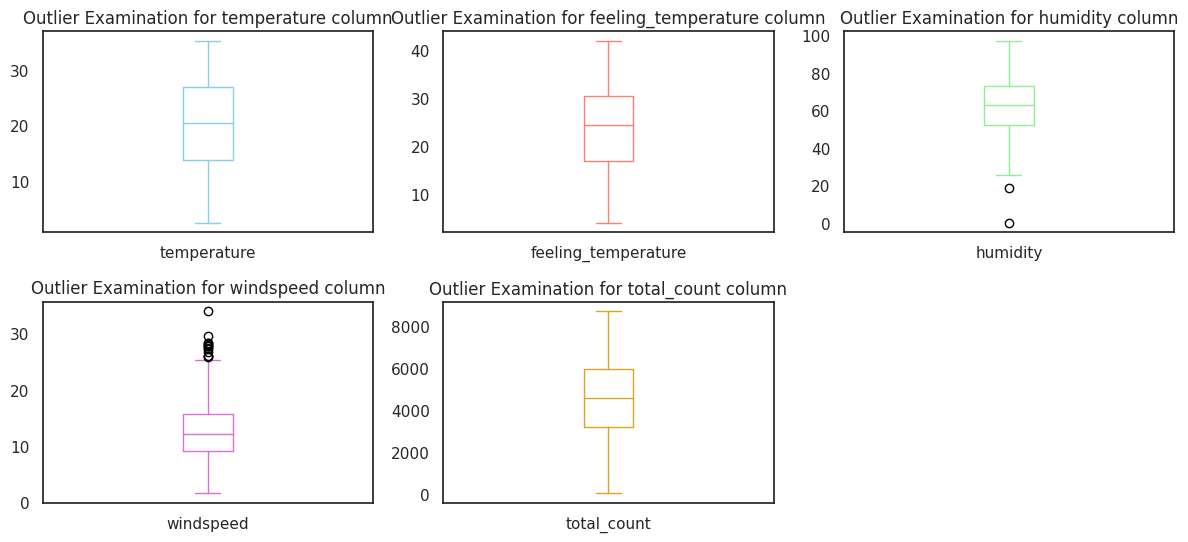

<Figure size 640x480 with 0 Axes>

In [340]:
cols = ['temperature', 'feeling_temperature','humidity','windspeed','total_count']
display(HTML("Plots boxplots to examine outliers in the specified columns of the given dataframe.\n"))
outlier_plot(df_clean, cols)
plt.show()
plt.tight_layout()

## Inference

In [341]:
##No outliers found in the data so no cleansing required
print("Number of Rows in df_clean after Cleaning : ",df_clean.shape[0],"\nNumber of columns in df_clean after Cleaning: ",df_clean.shape[1])

Number of Rows in df_clean after Cleaning :  730 
Number of columns in df_clean after Cleaning:  12


# Exploratory Data Analysis

#### __Univariate Analysis__ 
  → Mean, Median, Max, Min, Std, Variance, Count
  → Distribution ( Histogram, CountPlot, BoxPlot)
#### __Bivariate Analysis__
  → Relationship Between 2 Variables ( ScatterPlot, BoxPlot, BarPlot etc)
#### __Multivariate Analysis__
  → Relationship Between more variables ( Heatmap etc.)

In [342]:
numerical_columns  = ['temperature', 'feeling_temperature','humidity','windspeed','total_count']
categorical_columns = ['season','year','is_holiday','is_workingday','weather_condition','weekday','month']
print("Numerical_Columns :", numerical_columns)
print("\nCateogrical_Columns :", categorical_columns)

Numerical_Columns : ['temperature', 'feeling_temperature', 'humidity', 'windspeed', 'total_count']

Cateogrical_Columns : ['season', 'year', 'is_holiday', 'is_workingday', 'weather_condition', 'weekday', 'month']


## Univariate Exploration

In [343]:
# Class for performing univariate analysis on a specified column in a DataFrame.
class UnivariateAnalysis:
    # Initializes the UnivariateAnalysis object with the given DataFrame.
    def __init__(self, dataframe,column_name):       
        self.dataframe = dataframe
        self.column_name = column_name
        print(f"Initiating detailed analysis of {column_name}...")
        print(f"\nStatistical summary for {self.column_name}:\n{self.dataframe[self.column_name].describe()}")
        mode = self.dataframe[self.column_name].mode()[0]
        print(f"\nThe mode of {self.column_name} is: {mode}\n")

    # Performs univariate analysis on the specified column with bins.
    def analyze_with_bins(self, bin_range=None, discrete=False, value_counts=False):
        sns.set_style('whitegrid')
        plt.figure(figsize=(12, 6))
        print(f"Count summary for {self.column_name}:\n{self.dataframe[self.column_name].value_counts()}") if value_counts else ''
        sns.histplot(data=self.dataframe, x=self.column_name, bins=bin_range, discrete=discrete, kde=True, color='skyblue') if bin_range else sns.histplot(data=self.dataframe, x=self.column_name, kde=True, color='skyblue')
        plt.title(f'Distribution of {self.column_name}', fontsize=16, fontweight='bold')
        
        plt.xlabel(self.column_name, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.xticks(bin_range, rotation=45, fontsize=12) if bin_range else plt.xticks(rotation=45, fontsize=12)
        plt.yticks(fontsize=12)

        plt.tight_layout()
        plt.show()

    # Performs univariate analysis on the specified column without bins.
    def analyze_without_bins(self):
        sns.set_style('whitegrid')
    
        fig, ax = plt.subplots(1, 2, figsize=(16, 6))
        
        sns.histplot(data=self.dataframe, x=self.column_name, ax=ax[0], kde=True, color='salmon')
        ax[0].set_title(f'{self.column_name} Histogram', fontsize=16, fontweight='bold')
    
        sns.boxplot(data=self.dataframe, y=self.column_name, ax=ax[1], palette='muted')
        ax[1].set_title(f'{self.column_name} Box Plot', fontsize=16, fontweight='bold')
    
        for axis in ax:
            axis.set_xlabel(self.column_name, fontsize=14)
            axis.set_ylabel('Frequency', fontsize=14)
            axis.tick_params(axis="x", rotation=45, labelsize=12)
            axis.tick_params(axis="y", labelsize=12)
    
        plt.tight_layout()
        plt.show()

Initiating detailed analysis of total_count...

Statistical summary for total_count:
count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: total_count, dtype: float64

The mode of total_count is: 1096



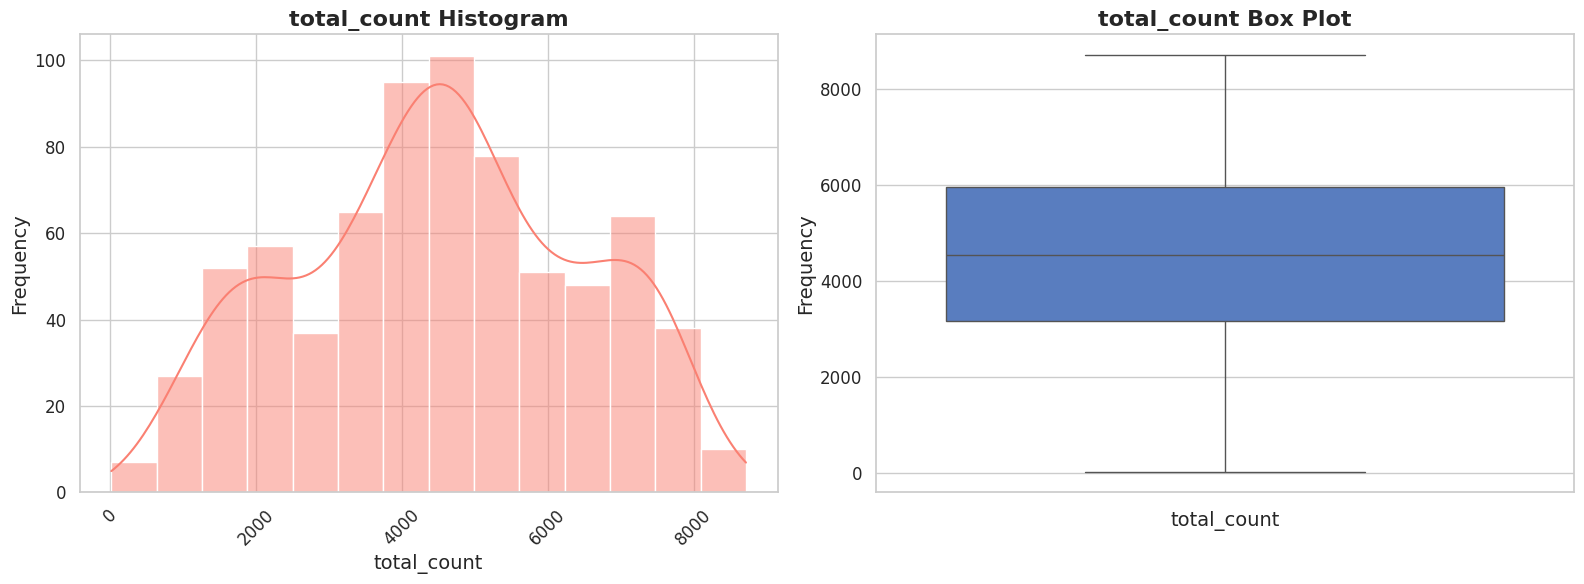

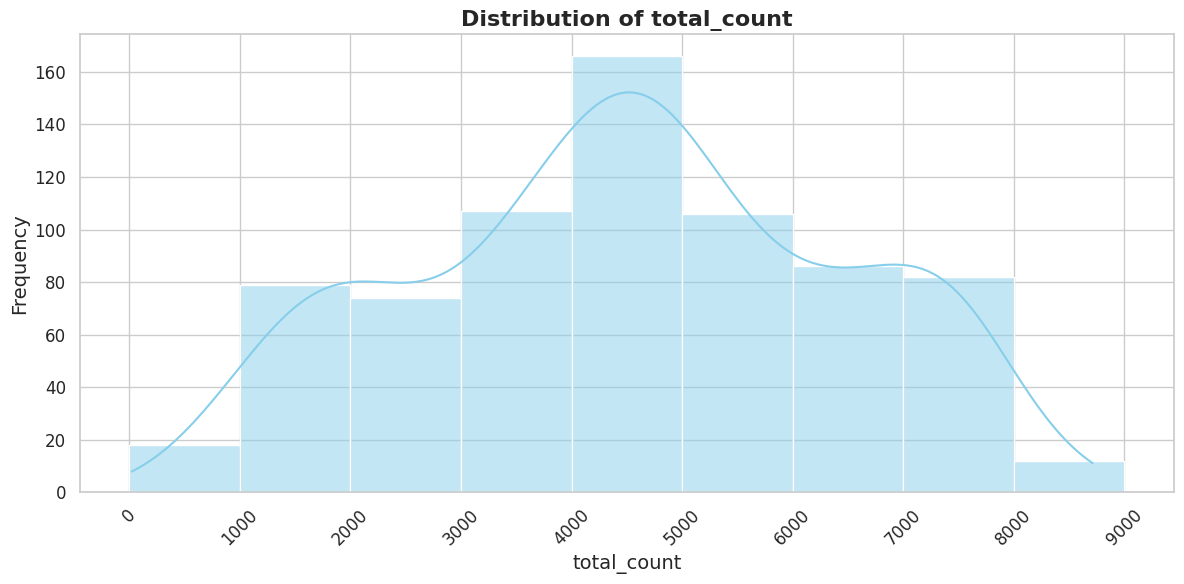

In [344]:
univariate_analysis = UnivariateAnalysis(df_clean, 'total_count')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=range(0, 10000, 1000))

### Observation:
 The distribution depicted above is almost normally distributed, indicating that the total bikes rented fell between 4000-5000, followed by 3000-4000 and 5000-6000 and then 6000-7000. However, the mean count is 4508 and the mode is 1096.

Initiating detailed analysis of windspeed...

Statistical summary for windspeed:
count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

The mode of windspeed is: 7.12545



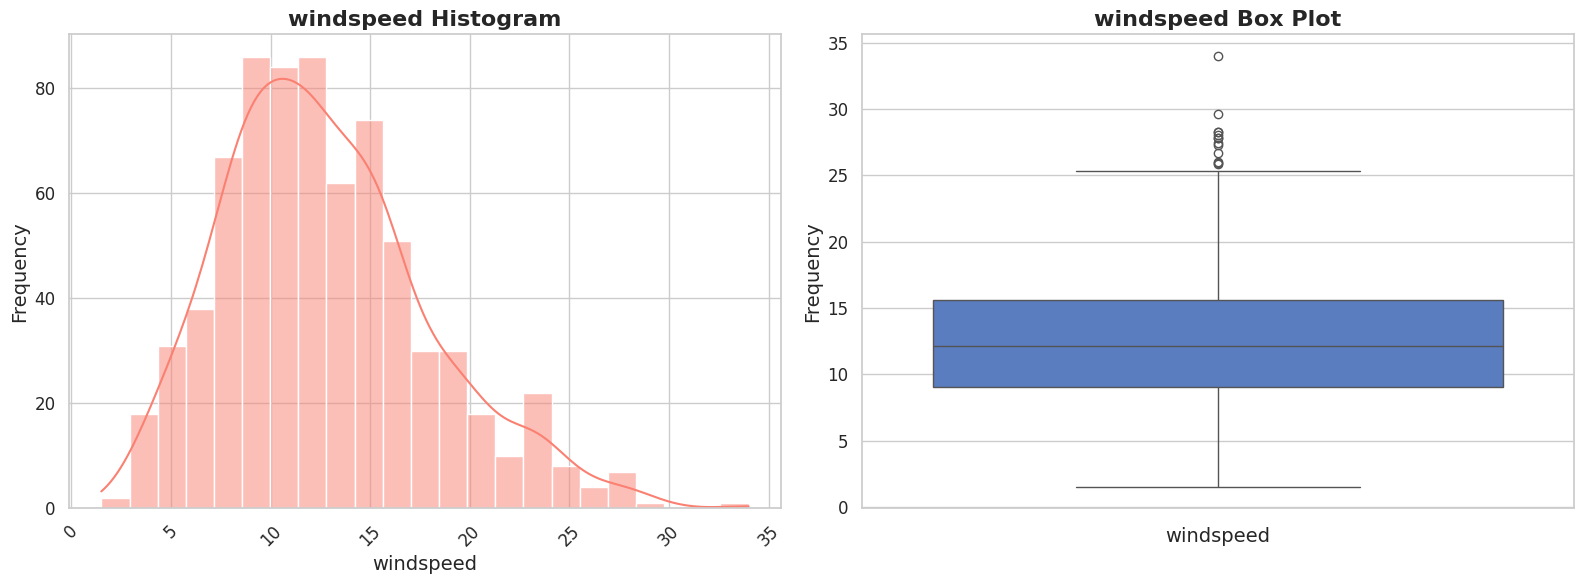

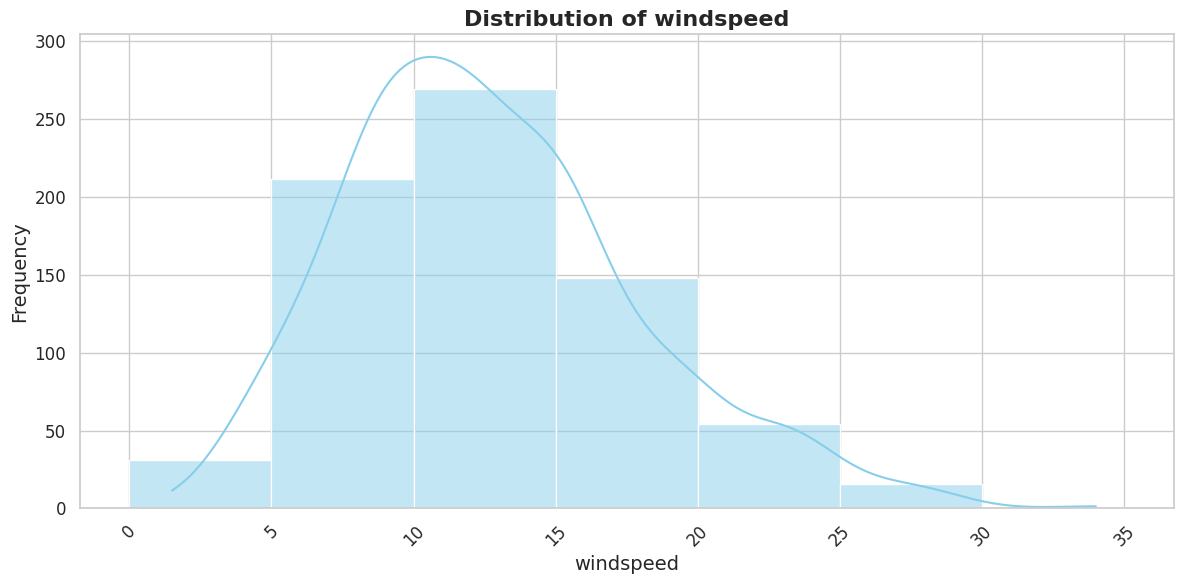

In [345]:
univariate_analysis = UnivariateAnalysis(df_clean, 'windspeed')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=range(0, 40, 5))

### Observation:
 The distribution depicted above is almost normally distributed, indicating that the windpseed  fell between 10-15, followed by 5-10 and then 15-20. However, the mean windspeed is 12 and the mode is 7.

Initiating detailed analysis of humidity...

Statistical summary for humidity:
count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: humidity, dtype: float64

The mode of humidity is: 61.3333



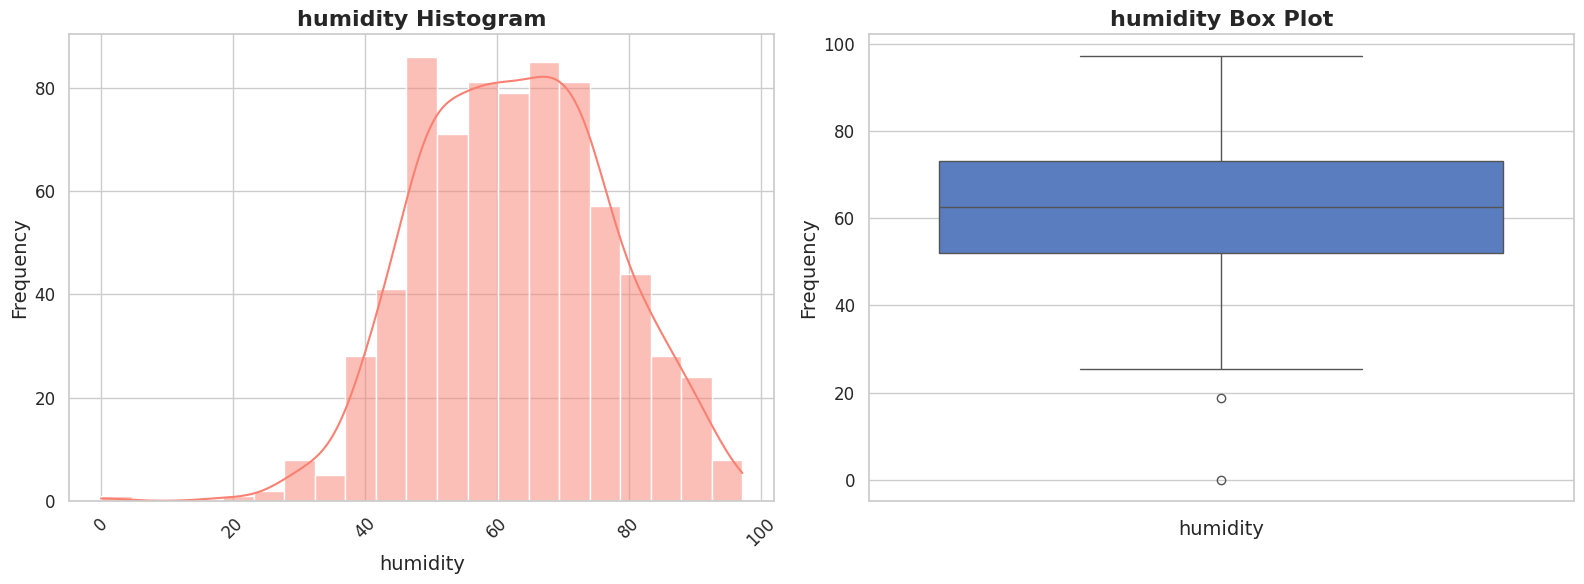

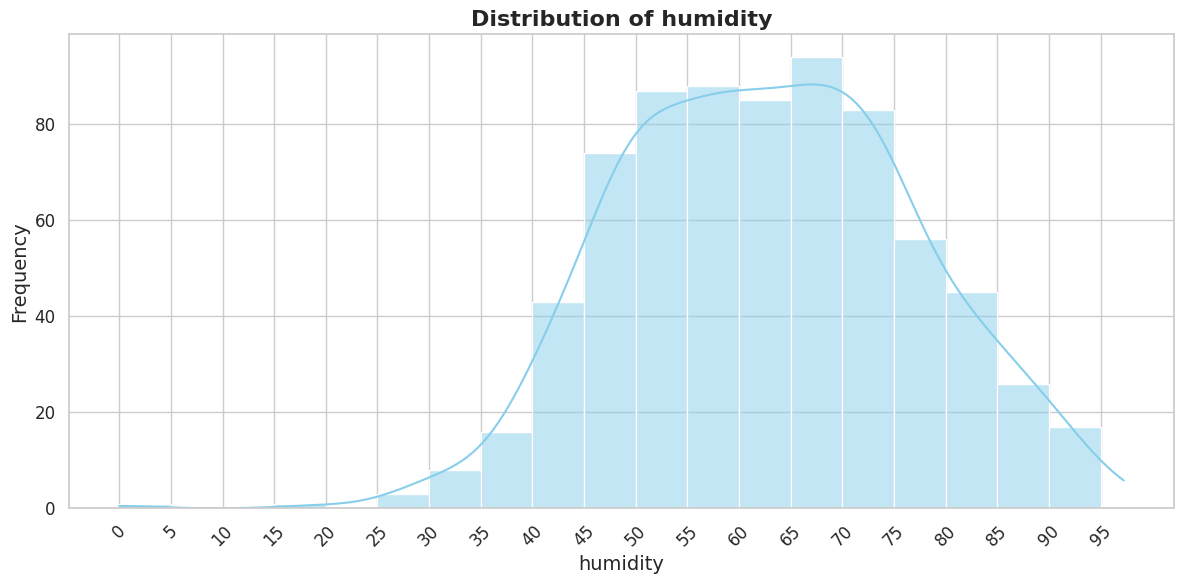

In [346]:
univariate_analysis = UnivariateAnalysis(df_clean, 'humidity')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=range(0, 100, 5))

### Observation:
 The distribution depicted above is almost normally distributed, indicating that the humidity  fell between 65-70, followed by 55-60 and then 50-55. However, the mean humidity is 62 and the mode is 61.

Initiating detailed analysis of feeling_temperature...

Statistical summary for feeling_temperature:
count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: feeling_temperature, dtype: float64

The mode of feeling_temperature is: 32.7344



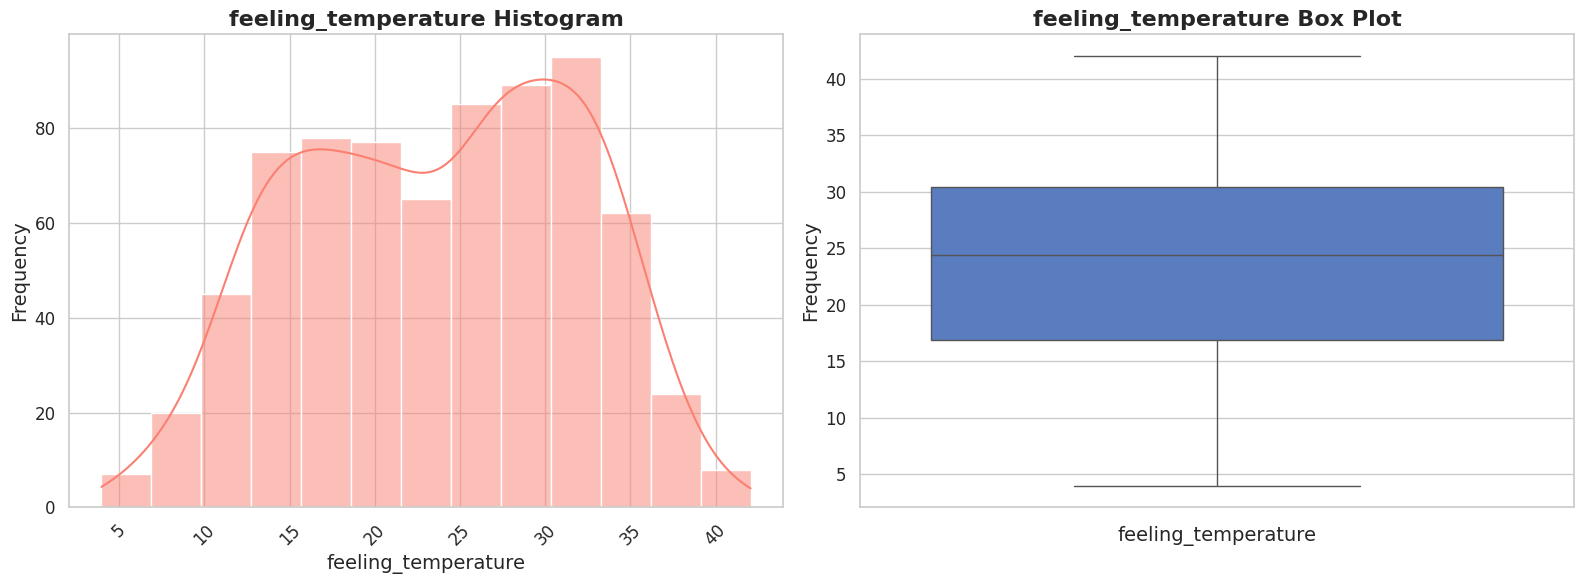

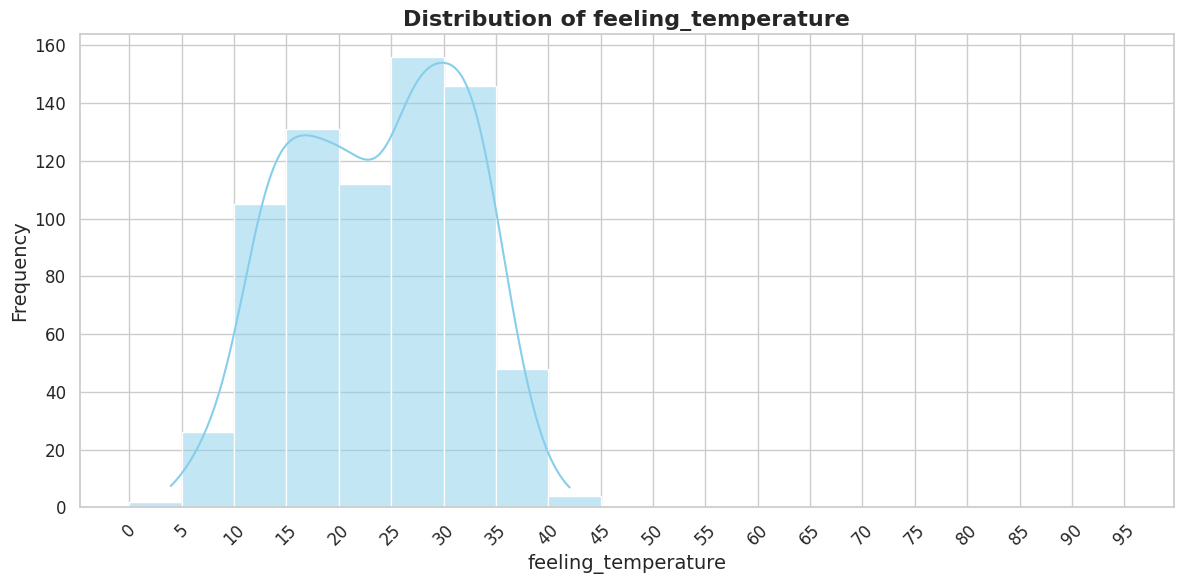

In [347]:
univariate_analysis = UnivariateAnalysis(df_clean, 'feeling_temperature')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=range(0, 100, 5))

### Observation:
 The distribution depicted above is somewhat normally distributed, indicating that the feeling temperature is mostly 25-35 and then 15-20.

Initiating detailed analysis of temperature...

Statistical summary for temperature:
count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temperature, dtype: float64

The mode of temperature is: 10.899153



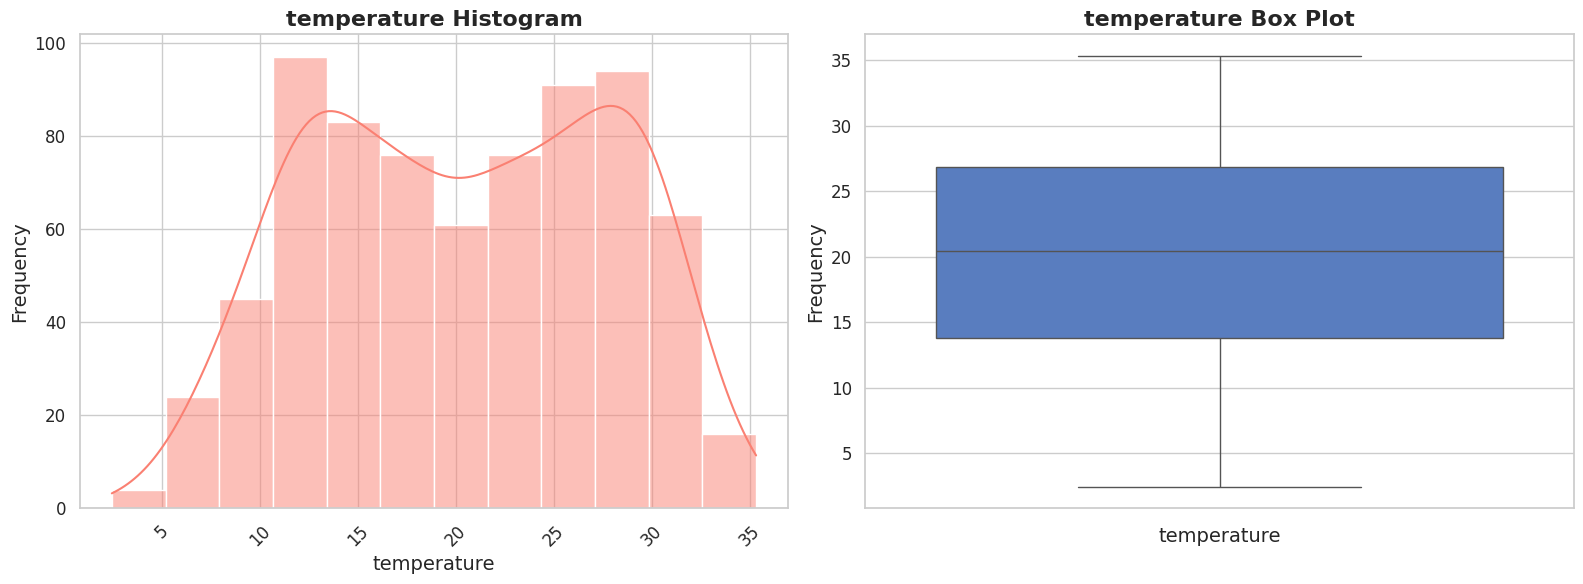

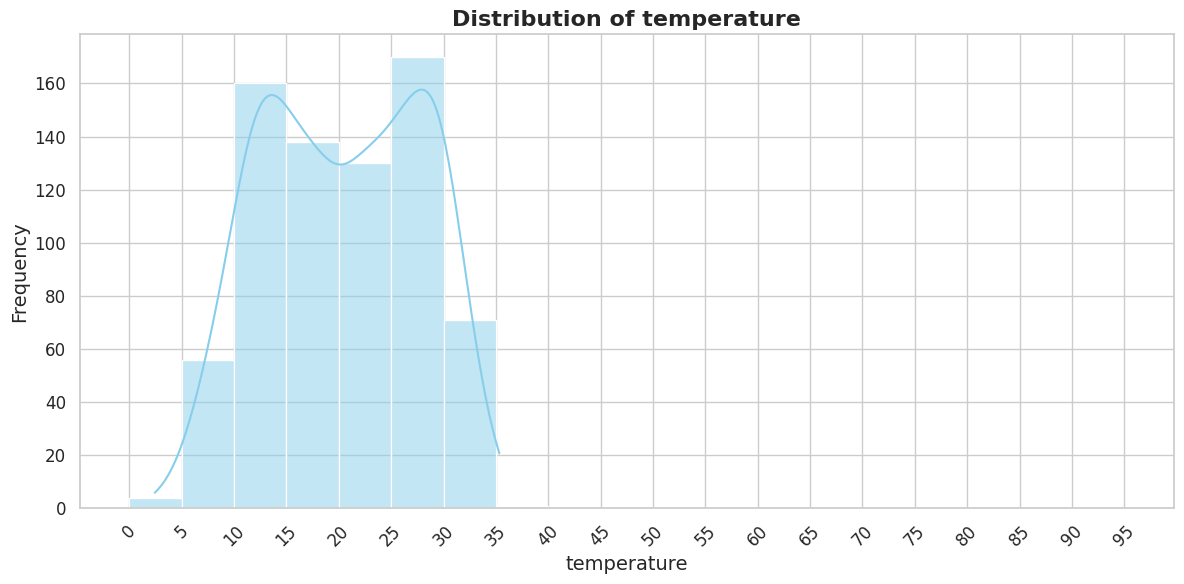

In [348]:
univariate_analysis = UnivariateAnalysis(df_clean, 'temperature')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=range(0, 100, 5))

### Observation:
 The distribution depicted above is almost symmetrical bimodal , indicating that the temperature is mostly 25-30 and then 10-15.

Initiating detailed analysis of season...

Statistical summary for season:
count      730
unique       4
top       Fall
freq       188
Name: season, dtype: object

The mode of season is: Fall

Count summary for season:
Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64


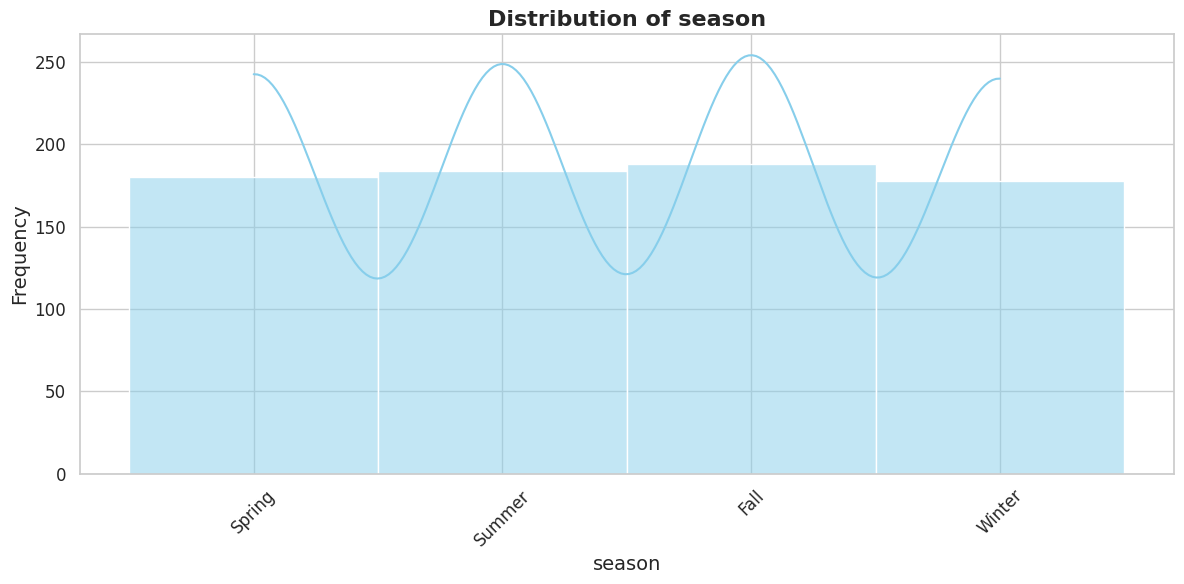

Initiating detailed analysis of year...

Statistical summary for year:
count      730
unique       2
top       2018
freq       365
Name: year, dtype: object

The mode of year is: 2018

Count summary for year:
2018    365
2019    365
Name: year, dtype: int64


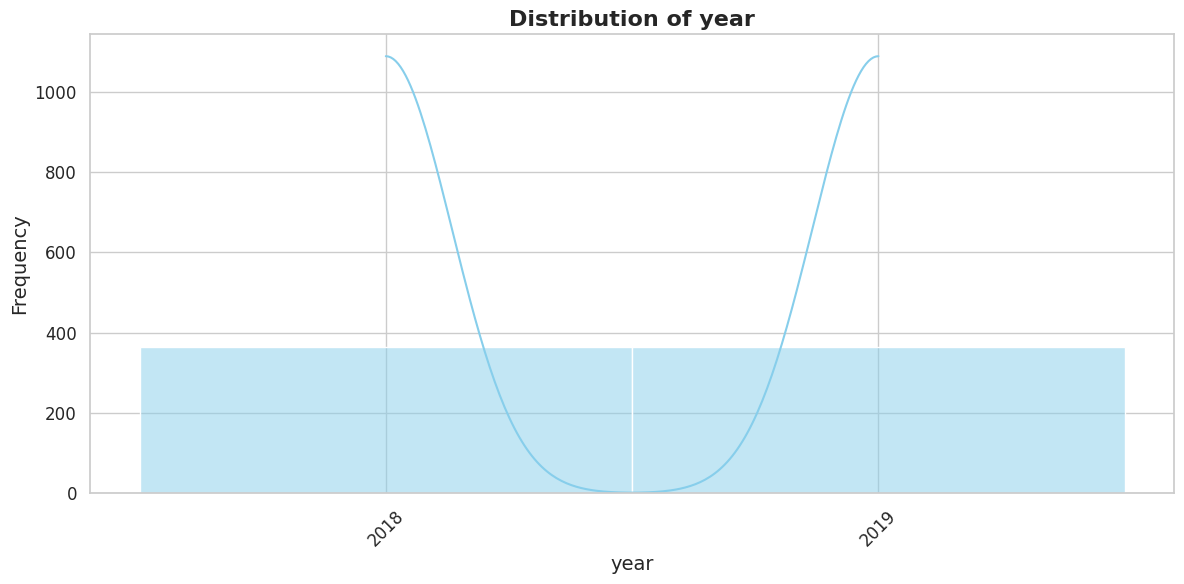

Initiating detailed analysis of is_holiday...

Statistical summary for is_holiday:
count       730
unique        2
top       False
freq        709
Name: is_holiday, dtype: object

The mode of is_holiday is: False

Count summary for is_holiday:
False    709
True      21
Name: is_holiday, dtype: int64


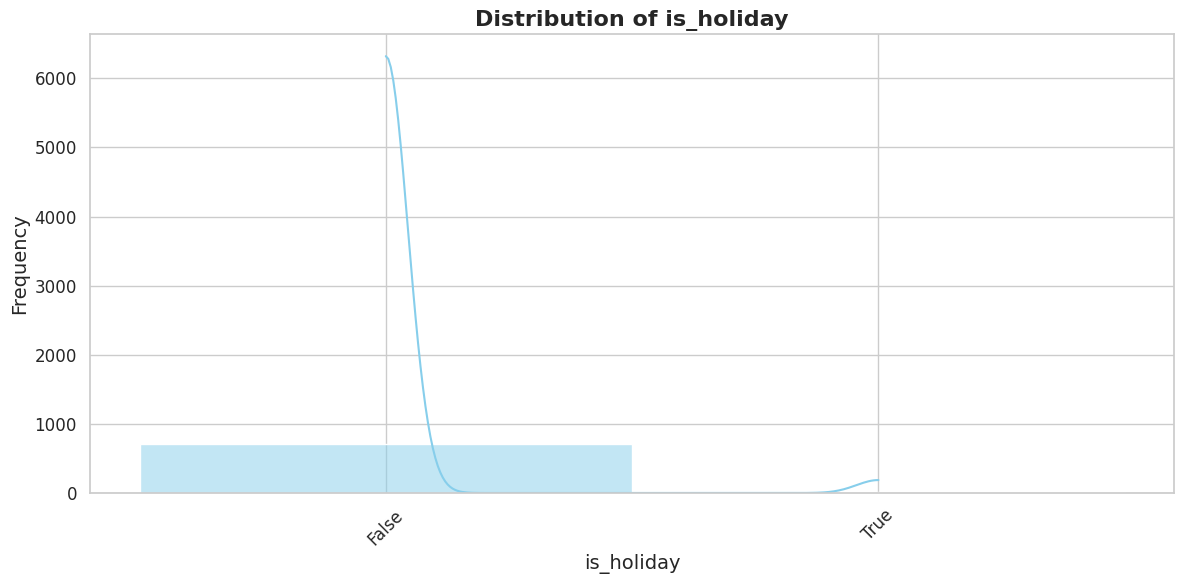

Initiating detailed analysis of is_workingday...

Statistical summary for is_workingday:
count      730
unique       2
top       True
freq       499
Name: is_workingday, dtype: object

The mode of is_workingday is: True

Count summary for is_workingday:
True     499
False    231
Name: is_workingday, dtype: int64


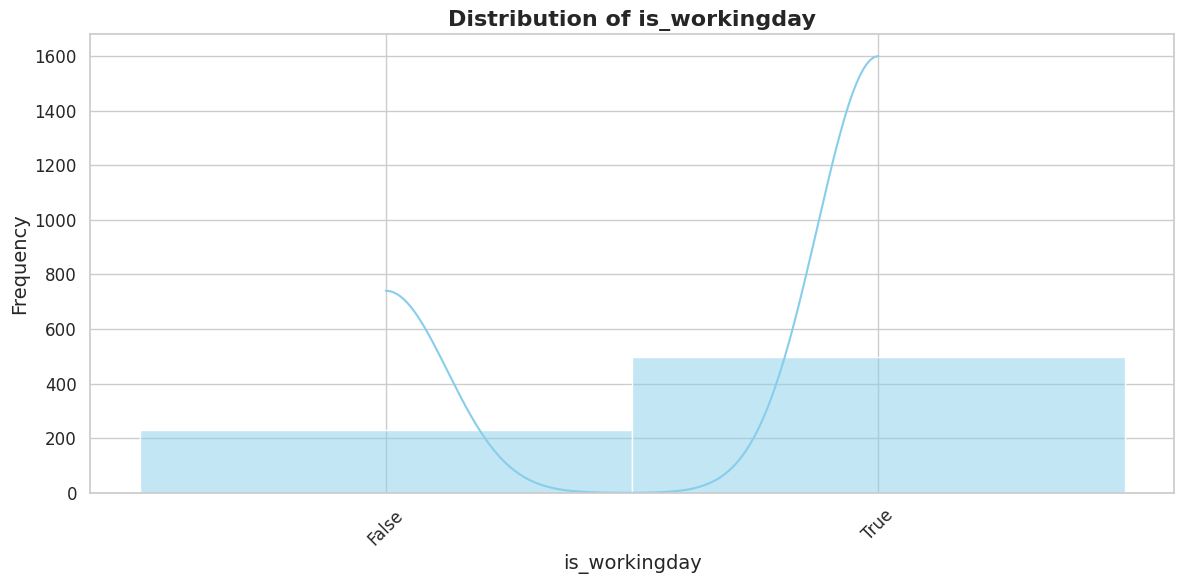

Initiating detailed analysis of weather_condition...

Statistical summary for weather_condition:
count       730
unique        3
top       Clear
freq        463
Name: weather_condition, dtype: object

The mode of weather_condition is: Clear

Count summary for weather_condition:
Clear                463
Mist & Cloudy        246
Light Snow & Rain     21
Name: weather_condition, dtype: int64


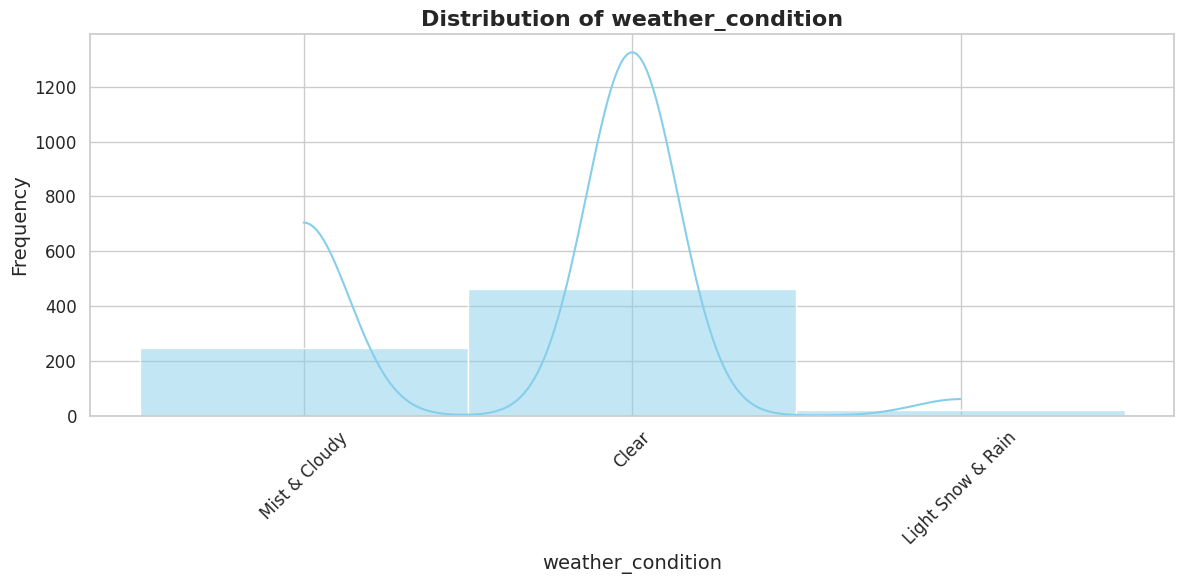

Initiating detailed analysis of weekday...

Statistical summary for weekday:
count          730
unique           7
top       Saturday
freq           105
Name: weekday, dtype: object

The mode of weekday is: Monday

Count summary for weekday:
Saturday     105
Sunday       105
Monday       105
Tuesday      104
Thursday     104
Friday       104
Wednesday    103
Name: weekday, dtype: int64


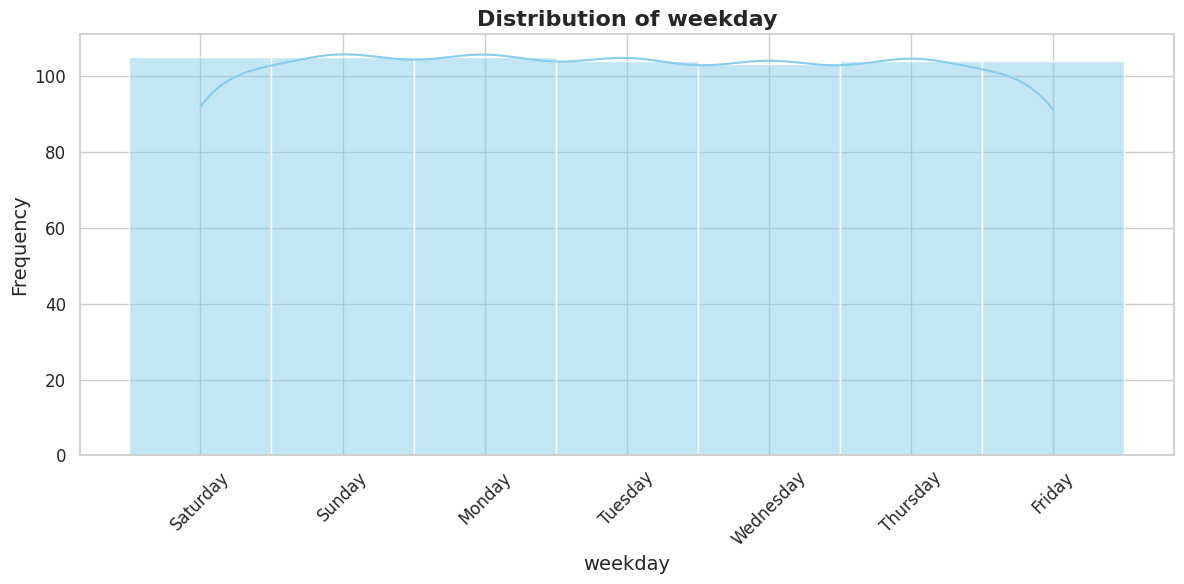

Initiating detailed analysis of month...

Statistical summary for month:
count         730
unique         12
top       January
freq           62
Name: month, dtype: object

The mode of month is: August

Count summary for month:
January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: month, dtype: int64


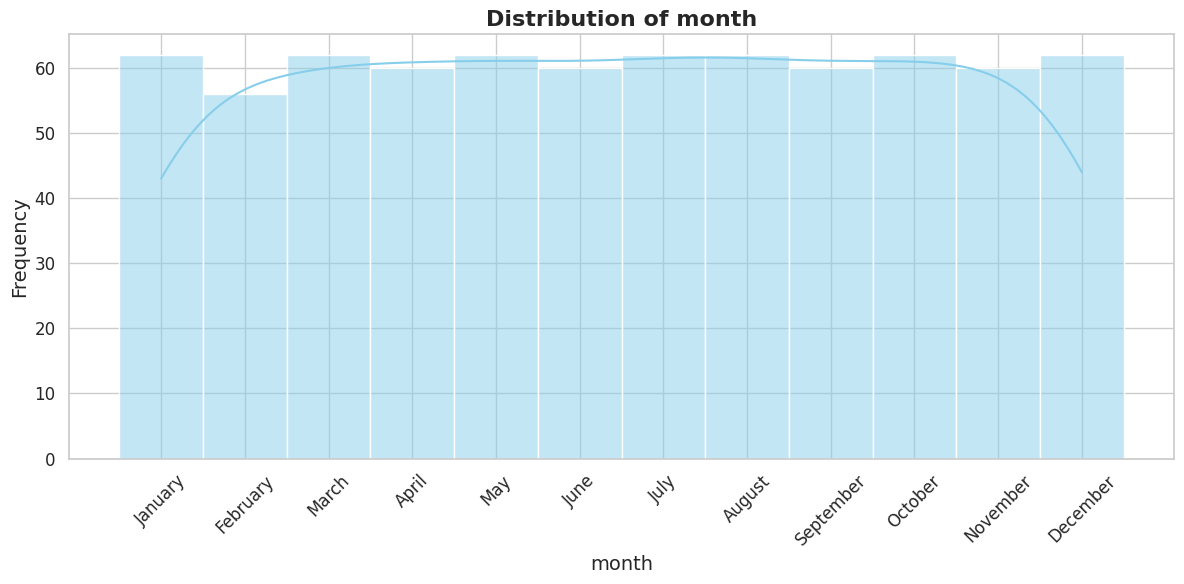

In [349]:
for category in categorical_columns:
        univariate_analysis = UnivariateAnalysis(df_clean, category)
        univariate_analysis.analyze_with_bins(value_counts=True)

### Observation:

 1. **season**: The season is almost equally shared across the 4 seasons with the mode season as fall.
   
 2. **year**: The Records are equally shared across the two years (0: 2018, 1:2019)
 
 3. **is_holiday**: Bike sharing has more records on non-holidays.
 
 4. **is_workingday**: Bike sharing dataset has more records on non holiday weekdays.
 
 5. **weather_condition**: Customers have used the service mostly on clear weather compared to other weathers
 
 6. **weekday** : Customers have used the service almost equally on all the days of the week
 
 7. **month**: Customers have used the service almost equally on all the months of the year

## Segmented Univariate Exploration

##### Segmenting the year into '2018' and '2019' and analyzing the variables that impact the number of bikes rented.

##### Year --> 2018

In [350]:
# Creating a dataframe for Segment year of 2018 
print("Creating a new dataframe \"df_year_2018\" for analysis")
df_year_2018 = df_clean[df_clean['year'] == '2018']
print("\nNumber of Rows in df_year_2018 after Cleaning : ",df_year_2018.shape[0],"\n\nNumber of columns in df_year_2018 after Cleaning: ",df_year_2018.shape[1])

Creating a new dataframe "df_year_2018" for analysis

Number of Rows in df_year_2018 after Cleaning :  365 

Number of columns in df_year_2018 after Cleaning:  12


##### Year --> 2019 

In [351]:
# Creating a dataframe for Segment year of 2019 
print("Creating a new dataframe \"df_year_2019\" for analysis")
df_year_2019 = df_clean[df_clean['year'] == '2019']
print("\nNumber of Rows in df_year_2019 after Cleaning : ",df_year_2019.shape[0],"\n\nNumber of columns in df_year_2019 after Cleaning: ",df_year_2019.shape[1])

Creating a new dataframe "df_year_2019" for analysis

Number of Rows in df_year_2019 after Cleaning :  365 

Number of columns in df_year_2019 after Cleaning:  12


Initiating detailed analysis of total_count...

Statistical summary for total_count:
count     365.000000
mean     3405.761644
std      1378.753666
min       431.000000
25%      2132.000000
50%      3740.000000
75%      4586.000000
max      6043.000000
Name: total_count, dtype: float64

The mode of total_count is: 1162



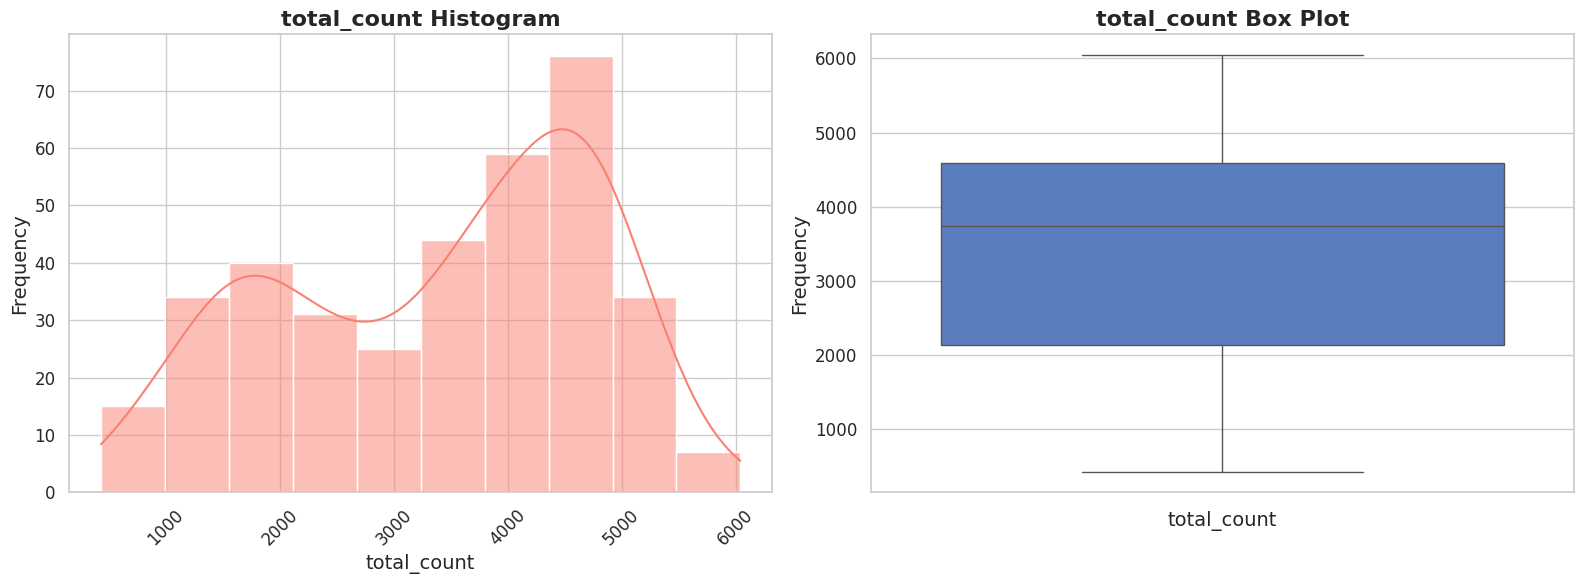

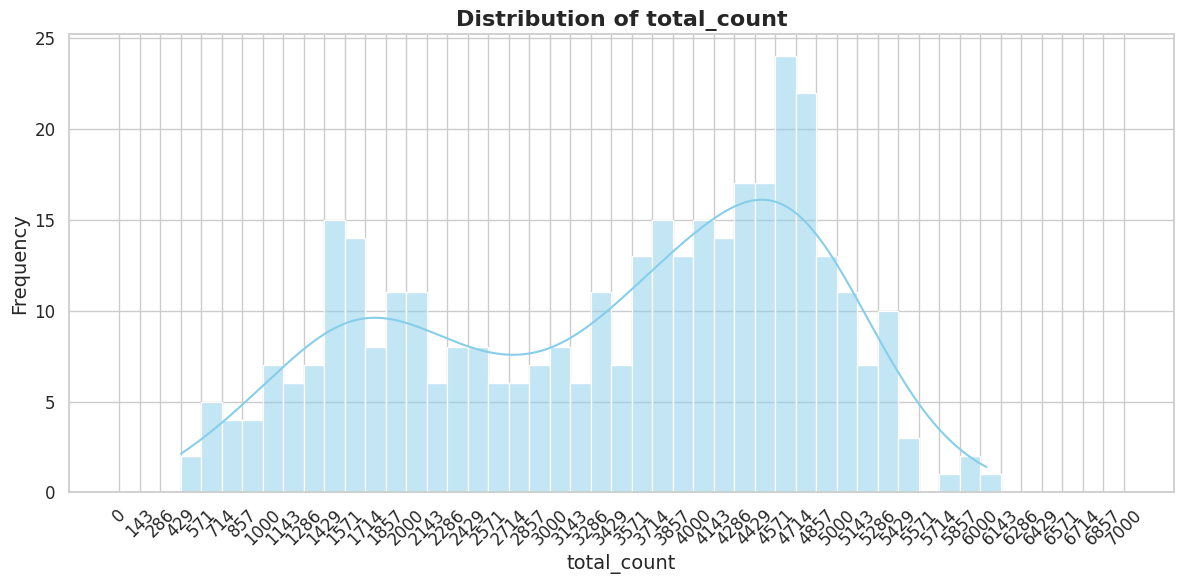

Initiating detailed analysis of total_count...

Statistical summary for total_count:
count     365.000000
mean     5610.252055
std      1780.183449
min        22.000000
25%      4375.000000
50%      5936.000000
75%      7013.000000
max      8714.000000
Name: total_count, dtype: float64

The mode of total_count is: 3214



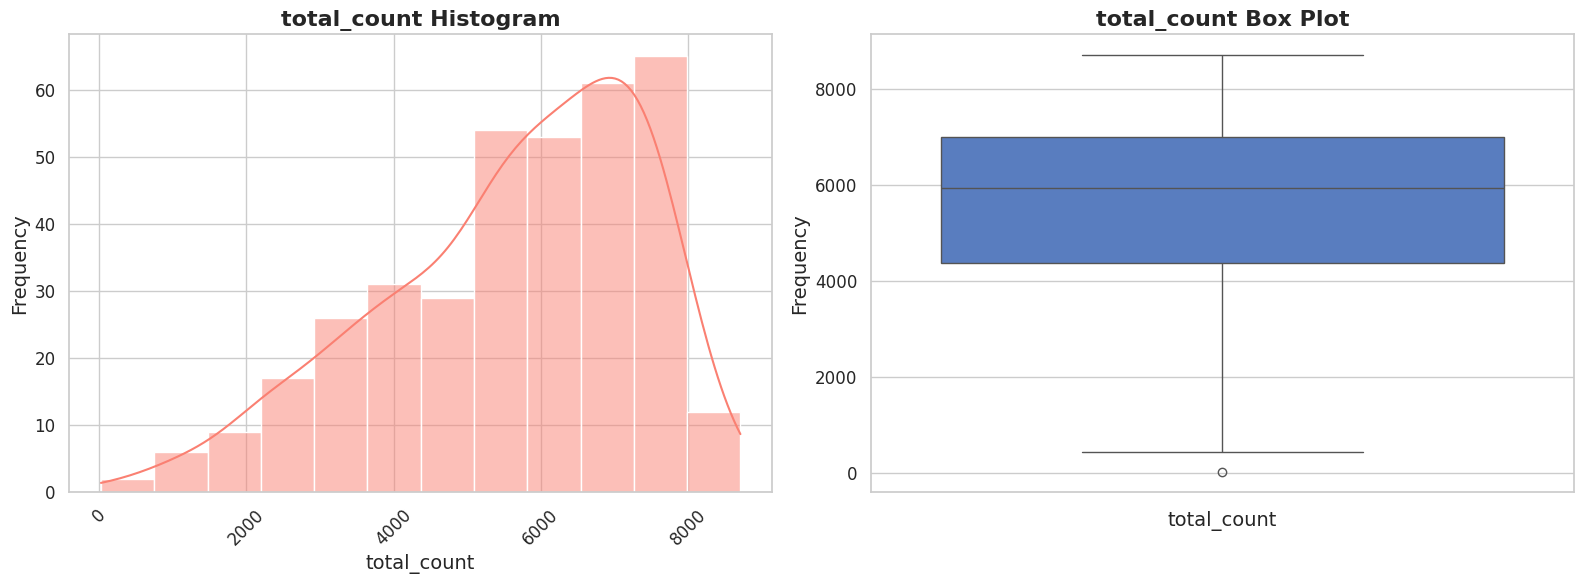

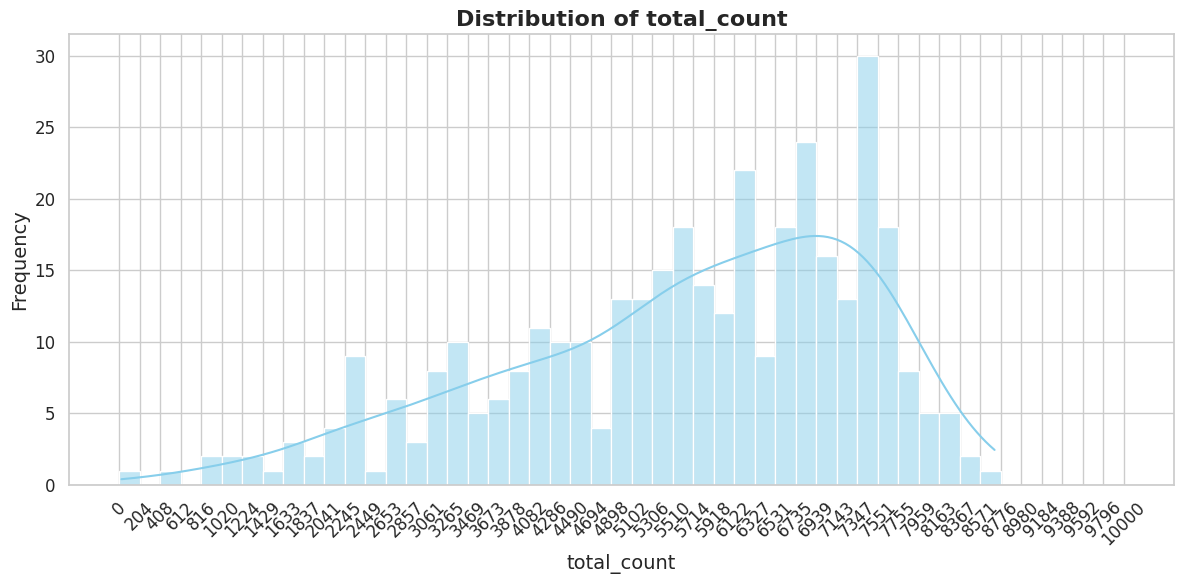

In [352]:
univariate_analysis = UnivariateAnalysis(df_year_2018, 'total_count')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=list(np.linspace(0.0, 7000.0, 50)))
univariate_analysis = UnivariateAnalysis(df_year_2019, 'total_count')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=list(np.linspace(0.0, 10000.0, 50)))

### Observations

 **total_count**: There has been a significant increase in the number of bikes rented from the year 2018 to 2019 with the mean increasing from ~4000 to 6000

## Bivariate Exploration

In [353]:
# A class for performing bivariate analysis on a DataFrame.

class BivariateAnalysis:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    # Generates a scatter plot for two specified columns in a DataFrame.
    def scatter_plot(self, x_column, y_column, ax, marker_size=10, alpha=0.2, color='orange'):

        sns.set(style="whitegrid")
        # Scatter plot with regression line
        sns.regplot(data=self.dataframe, x=x_column, y=y_column, scatter_kws={'s': marker_size, 'alpha': alpha, 'color': color}, 
                    line_kws={'color': 'red'}, ax=ax)

        # Set plot title and labels
        ax.set_title(f'Scatter Plot: {x_column} vs {y_column}', fontsize=13)
        ax.set_xlabel(x_column, fontsize=10)
        ax.set_ylabel(y_column, fontsize=10)
        plt.tight_layout()


    # Generates a boxplot for a categorical column against a numerical column for bivariate analysis.
    def boxplot(self, categorical_column, numerical_column, ax, palette='pastel'):
        
        sns.set(style="whitegrid")

        sns.boxplot(data=self.dataframe, x=categorical_column, y=numerical_column, palette=palette, ax=ax)

        # Set plot title and labels
        ax.set_title(f'Boxplot: {categorical_column} vs {numerical_column}', fontsize=13)
        ax.set_xlabel(categorical_column, fontsize=10)
        ax.set_ylabel(numerical_column, fontsize=10)

        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        plt.tight_layout()

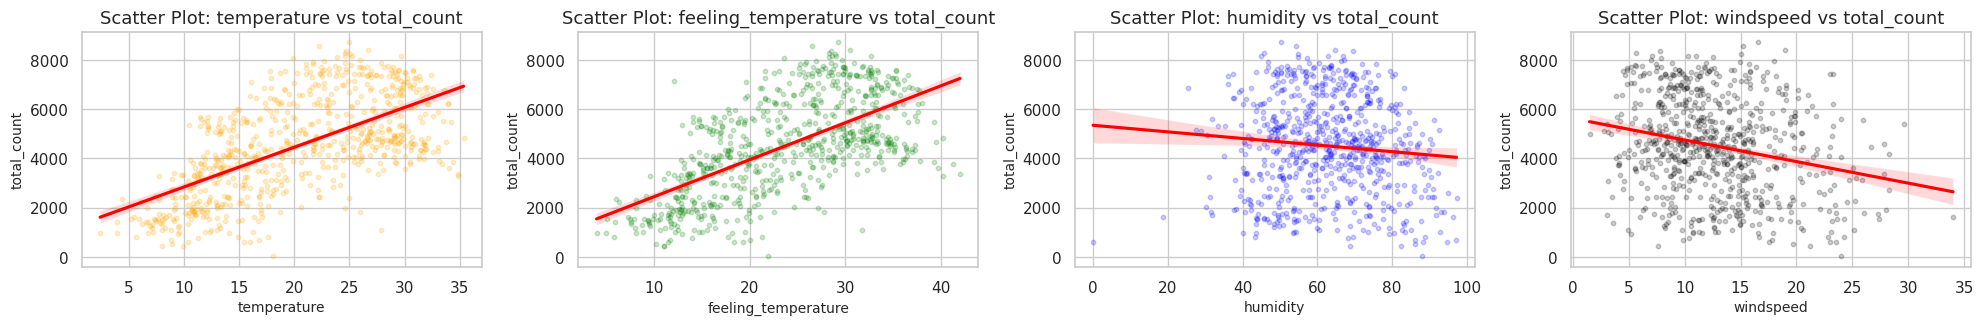

In [354]:
numerical = ['temperature', 'feeling_temperature', 'humidity', 'windspeed']
target_column = 'total_count'
colors = ['orange','green','blue','black']

length = len(numerical)
fig, axes = plt.subplots(nrows=(length + 2) // 1, ncols=length, figsize=(20, 18))
axes = axes.flatten()

bivariate_analysis = BivariateAnalysis(df_clean)
for i in range(length):  
    bivariate_analysis.scatter_plot(numerical[i], target_column, ax=axes[i], color=colors[i])

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

### Graph Observations and Summary:

#### 1. temperature vs total_count
- **Observation:** The scatter plot shows a positive correlation between temperature and total_count.
- **Summary:** Higher temperatureeratures are associated with higher total_counts.

#### 2. feeling_temperature vs total_count
- **Observation:** The scatter plot shows a  positive correlation between feel_temperature and total_count.
- **Summary:** Higher feel_temperatureerature values are associated with higher total_counts.

#### 3. Humidity vs total_count
- **Observation:** The scatter plot shows a weak negative correlation between humidity and total_count. 
- **Summary:** The weak negative correlation suggests minimal influence of humidity on total_count.

#### 4. Windspeed vs total_count
- **Observation:** The scatter plot shows a weak positive correlation between windspeed and total_count. 
- **Summary:** The weak positive correlation suggests minimal influence of windspeed on total_count.

### Bivariate Analysis - Categorical vs Numerical

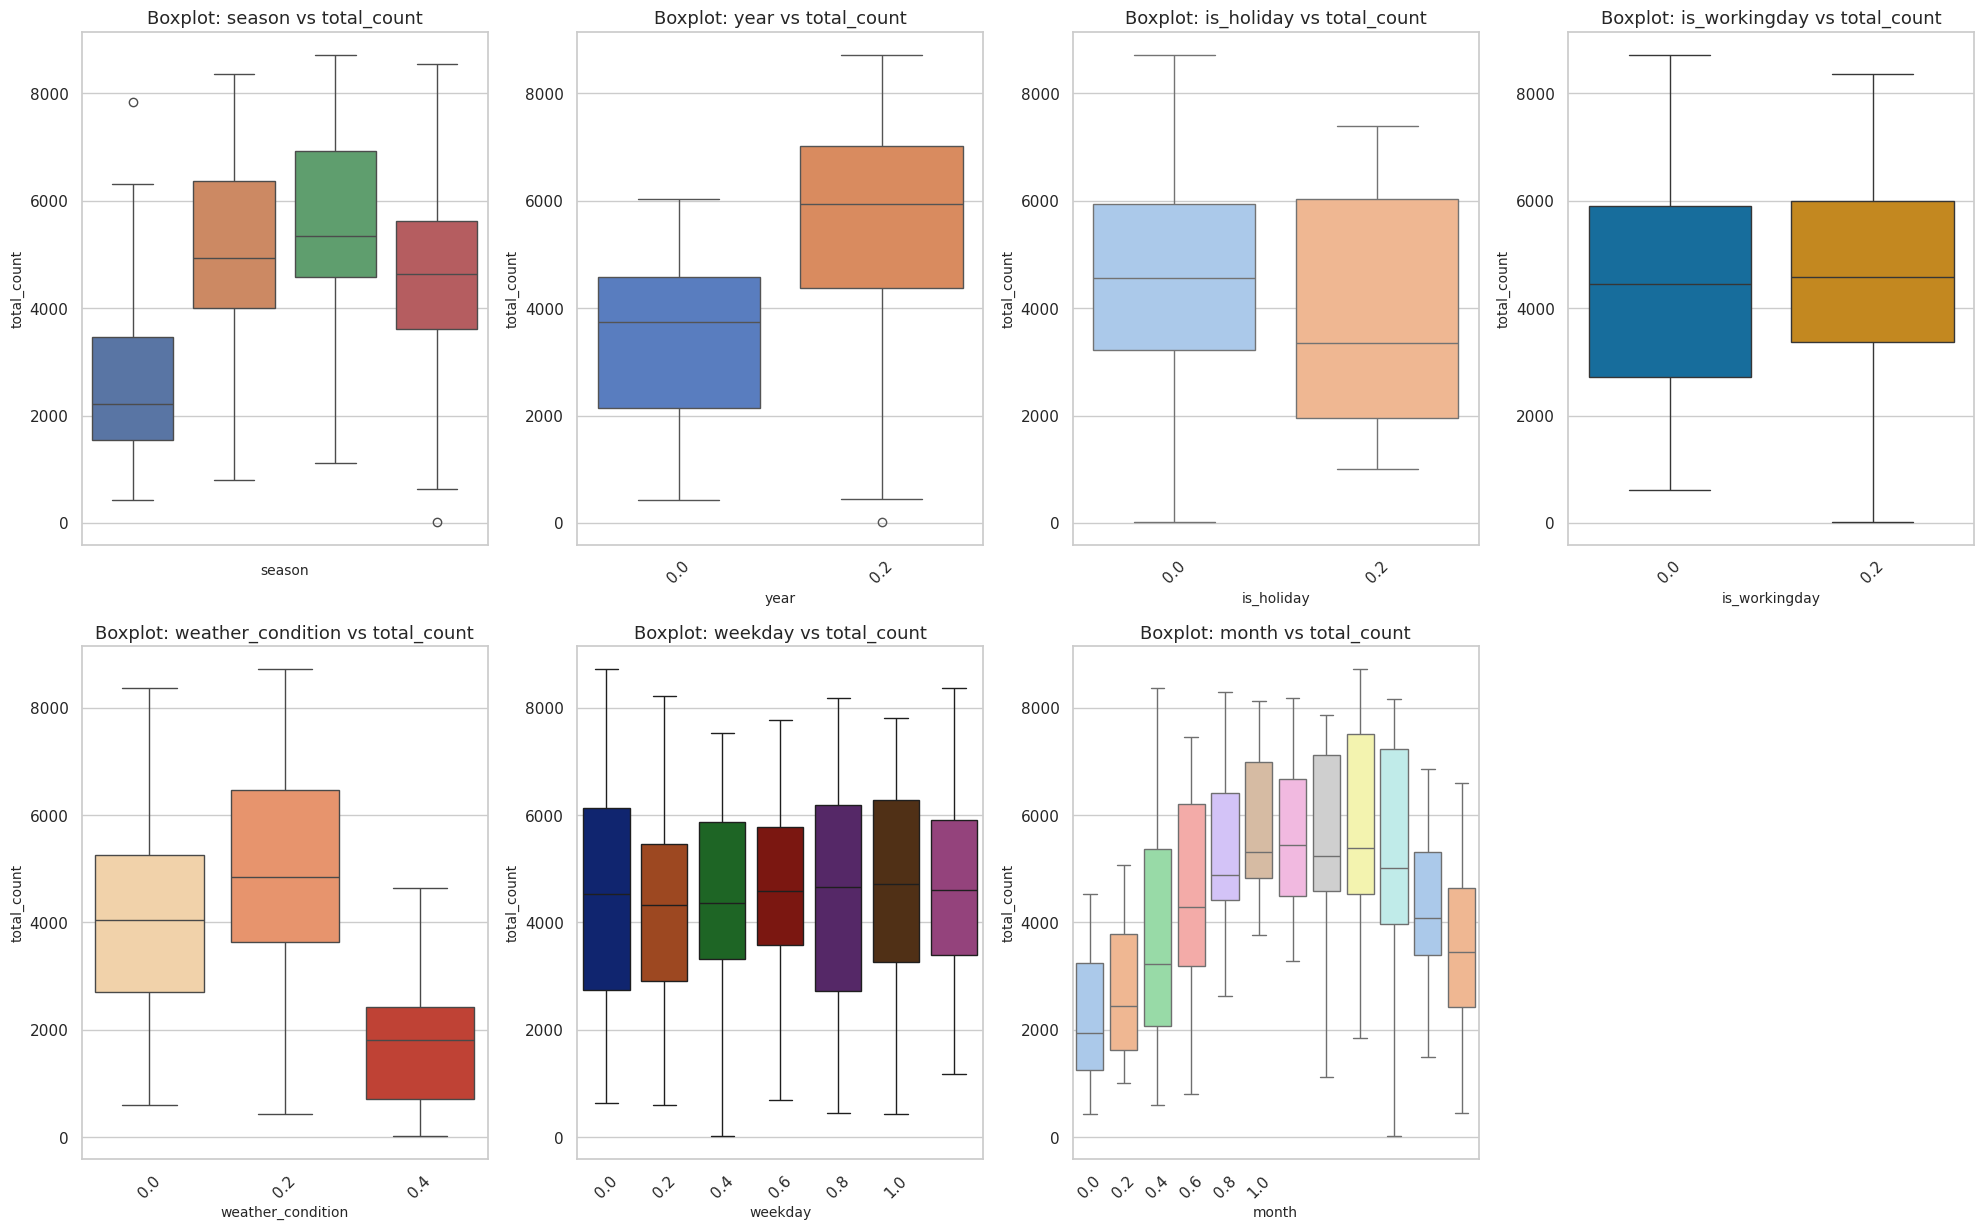

In [355]:
target_column = 'total_count'
palette = ['deep','muted','pastel','colorblind','OrRd','dark','pastel']

length = len(categorical_columns)

fig, axes = plt.subplots(nrows=(length + 2) // 3, ncols=4, figsize=(20, 18))
axes = axes.flatten()

bivariate_analysis = BivariateAnalysis(df_clean)
for i in range(length):   
    bivariate_analysis.boxplot(categorical_columns[i], target_column, ax=axes[i], palette=palette[i])

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

### Graph Observations and Summary:

#### 1. **Season vs total_count**
   - **Observation**: Rentals are highest in the fall and summer seasons. Winter has the lowest rentals, and spring shows moderate usage.
   - **Summary**: Fall and summer seasons see a peak in bike rentals, indicating favorable weather conditions. Winter sees the least bike usage.

#### 2. **Month vs total_count**
   - **Observation**: Rentals increase from January, peaking around May and October, and then decline towards the end of the year.
   - **Summary**: Bike rentals are higher during the warmer months (March to October), with May and October being peak months. Rentals are lowest in December and January.

#### 3. **Year vs total_count**
   - **Observation**: There is a significant increase in rentals from 2018 to 2019.
   - **Summary**: Bike rentals grew notably from 2018 to 2019, indicating increasing popularity or improved service.

#### 4. **is_holiday vs total_count**
   - **Observation**: Rentals on is_holidays are slightly higher than on non-is_holidays, but the difference is minimal.
   - **Summary**: Bike rentals remain fairly consistent regardless of is_holidays, with a slight increase on is_holidays.

#### 5. **Weekday vs total_count**
   - **Observation**: Rentals are relatively even across the weekdays, with no significant drop during weekends.
   - **Summary**: Bike rentals are steady throughout the week, suggesting consistent usage patterns on both weekdays and weekends.

#### 6. **is_workingday vs total_count**
   - **Observation**: Rentals on working days are slightly higher compared to non-working days.
   - **Summary**: There is a marginal increase in bike rentals on working days, possibly indicating commuting usage.

#### 7. **weather_condition vs total_count**
   - **Observation**: Clear weather conditions (good) have the highest rentals, while bad and severe weather conditions see a significant drop.
   - **Summary**: Favorable weather conditions (clear) lead to higher bike rentals. Poor weather conditions (bad and severe) result in lower usage.

### Bivariate Analysis - Categorical vs Categorical

In [356]:
# Distribution of loan amounts across different categories of loan_status and other categorical variables

def analyze_categorical_relationships(df, categorical_columns, target_column, value_column):
    results = {}
  
    for category in categorical_columns:
        if category != target_column:
            category_total_count = df[category].value_counts().sort_index()
            pivot_table = df.pivot_table(index=target_column, columns=category, values=value_column, aggfunc='count')
            pivot_table = round(pivot_table/pivot_table.sum() *100 , 2)
            results[category] = pivot_table
            results[category+"_count"] = category_total_count
    return results

def plot_categorical_relationships(pivot_table, category, target_column, value_column, ax):
    # Generate a custom color palette
    num_categories = pivot_table.shape[1]
    custom_palette = sns.color_palette("tab20", n_colors=num_categories)
    
    # Plotting
    pivot_table.plot(kind='bar', stacked=True, color=custom_palette, ax=ax)

    ax.set_xlabel(target_column, fontsize=10)
    ax.set_ylabel(value_column, fontsize=10)
    
    ax.set_title(f"Distribution of {value_column} across {target_column} and {category}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.legend(title=category, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

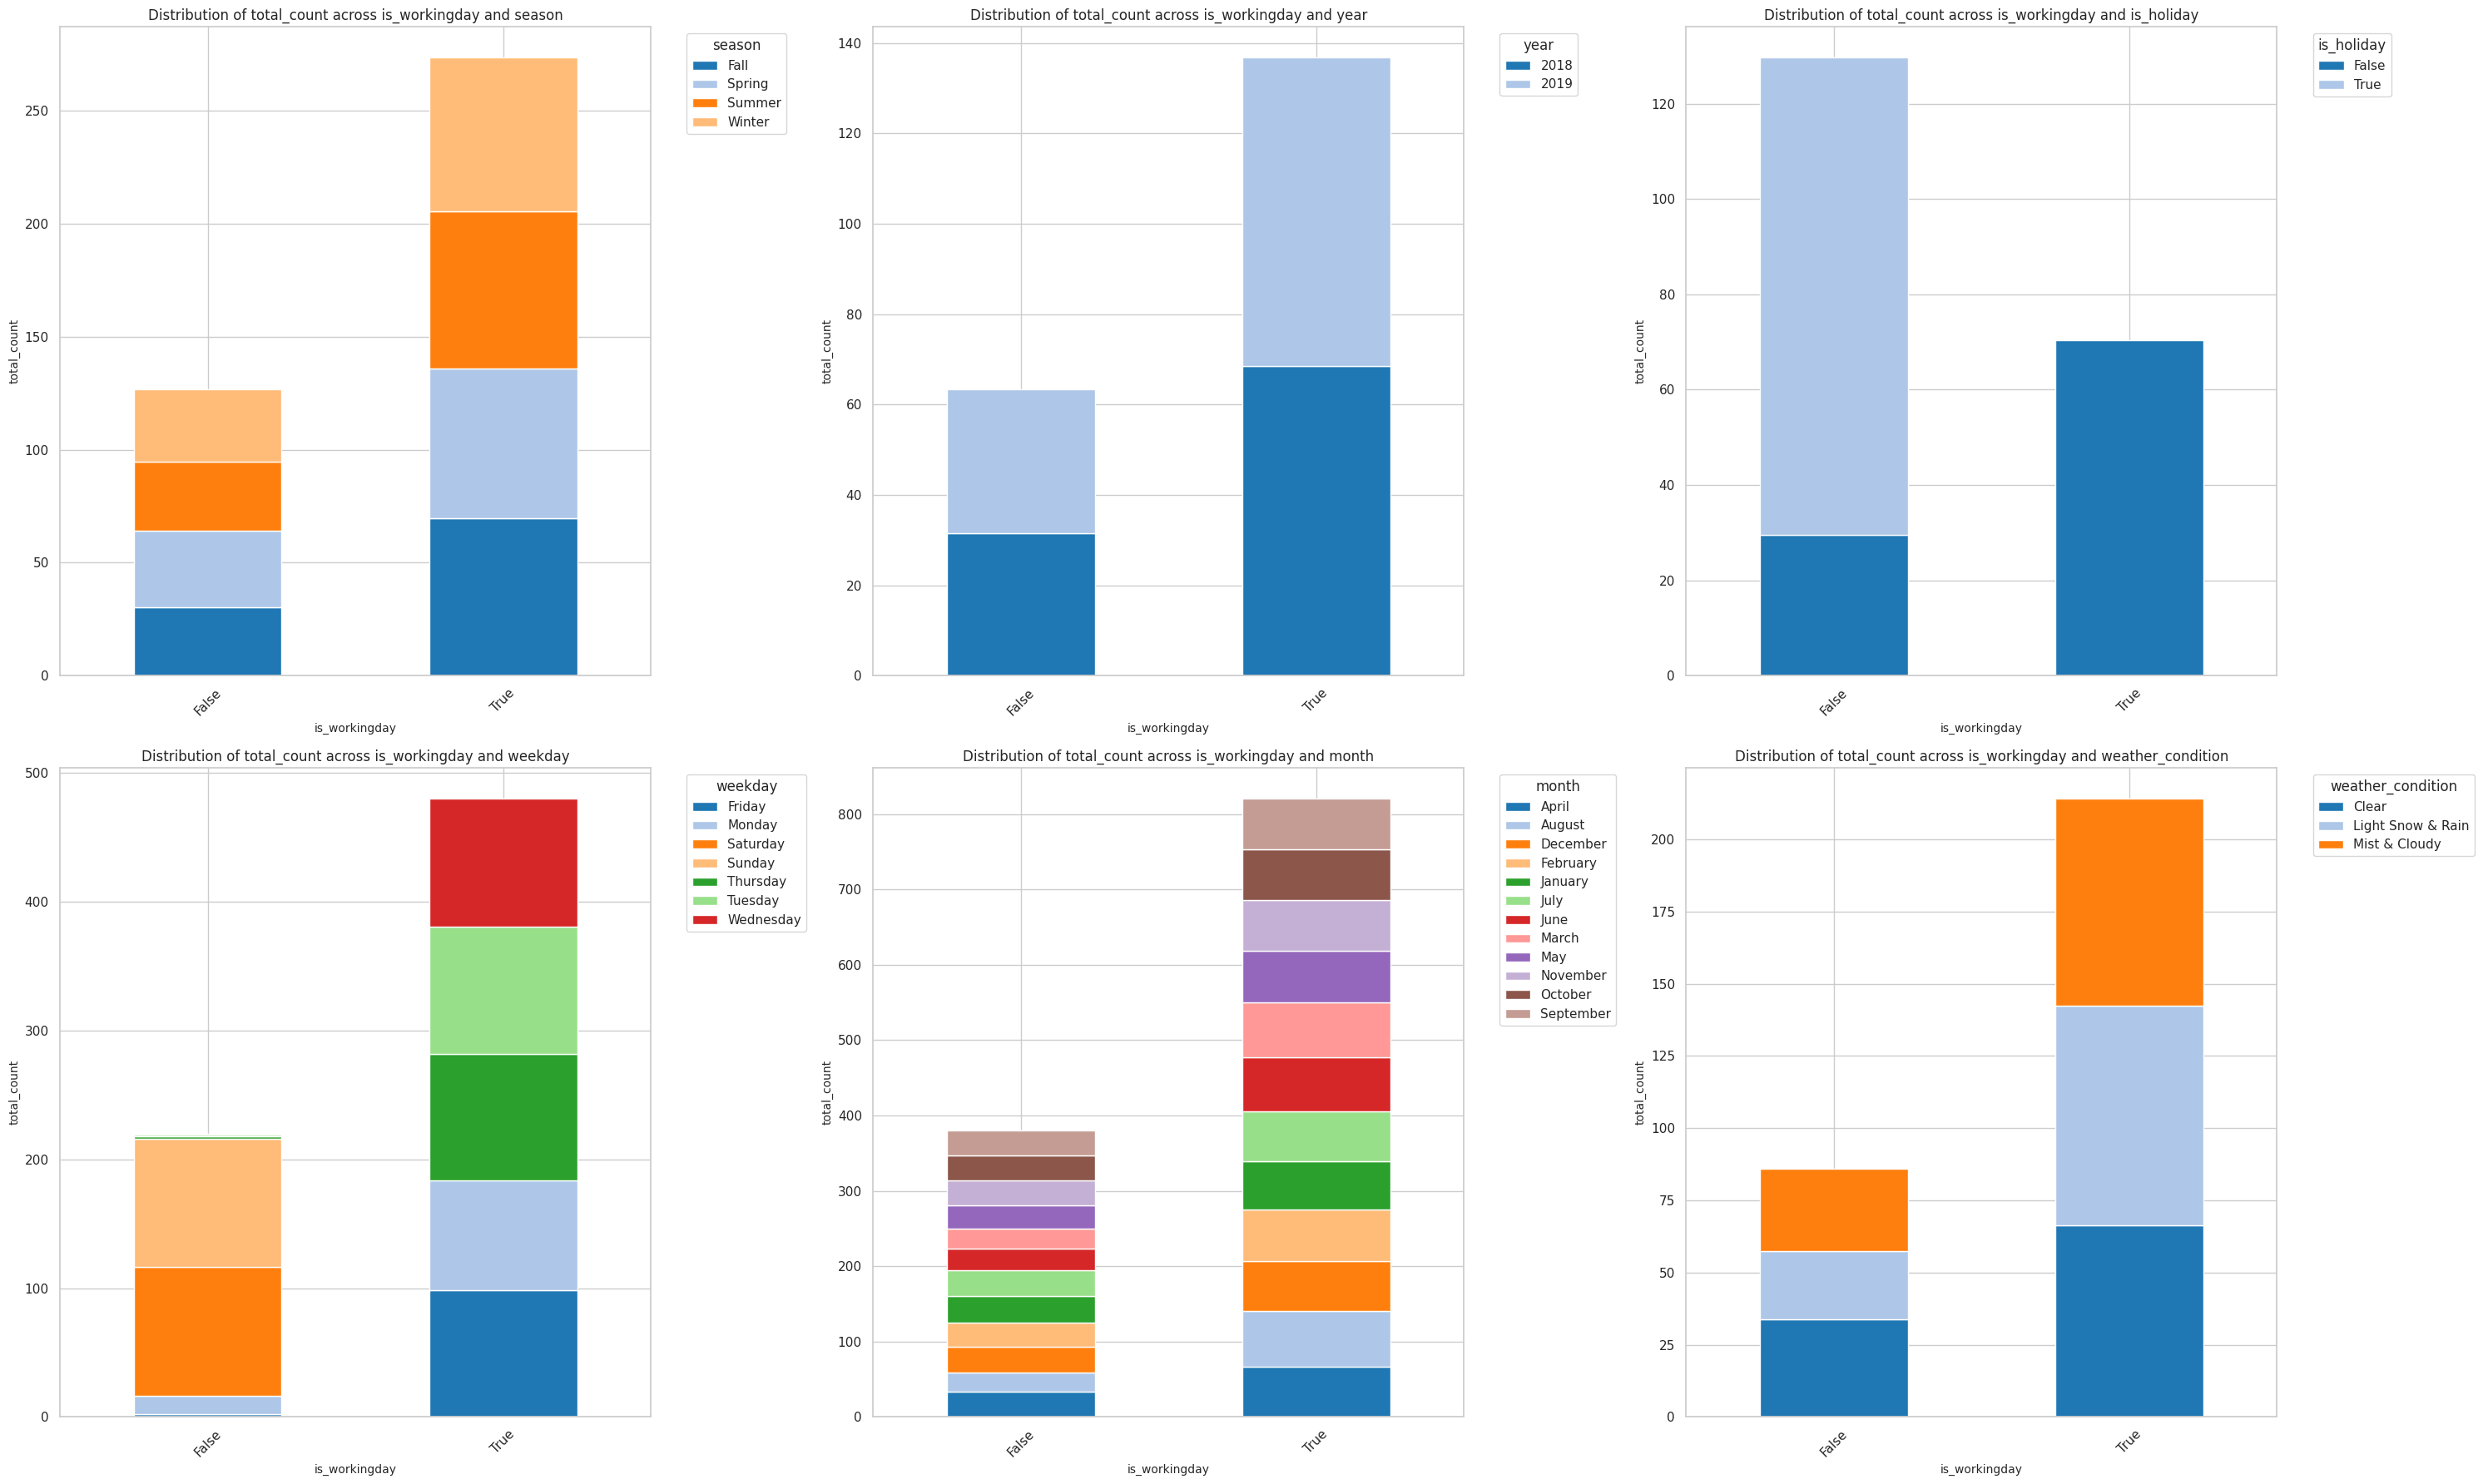

season,is_workingday,Fall,Spring,Summer,Winter
0,False,30.32,33.89,30.43,32.02
1,True,69.68,66.11,69.57,67.98


year,is_workingday,2018,2019
0,False,31.51,31.78
1,True,68.49,68.22


is_holiday,is_workingday,False,True
0,False,29.62,100.0
1,True,70.38,NaN


weekday,is_workingday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,False,1.92,14.29,100.0,100.0,1.92,0.96,0.97
1,True,98.08,85.71,NaN,NaN,98.08,99.04,99.03


month,is_workingday,April,August,December,February,January,July,June,March,May,November,October,September
0,False,33.33,25.81,33.87,32.14,35.48,33.87,28.33,27.42,30.65,33.33,32.26,33.33
1,True,66.67,74.19,66.13,67.86,64.52,66.13,71.67,72.58,69.35,66.67,67.74,66.67


weather_condition,is_workingday,Clear,Light Snow & Rain,Mist & Cloudy
0,False,33.69,23.81,28.46
1,True,66.31,76.19,71.54


In [357]:
categories = ['season', 'year', 'is_holiday', 'weekday', 'month', 'weather_condition']
target_column = 'is_workingday'
value_column = 'total_count'

result = analyze_categorical_relationships(df_clean, categories, target_column, value_column)

length = len(categories)
fig, axes = plt.subplots(nrows=(length) // 3, ncols=3, figsize=(30, 18))
axes = axes.flatten()

for i in range(length):
        category = categories[i]
        table = result[categories[i]]  
        plot_categorical_relationships(table, category, target_column, value_column, axes[i])      
plt.tight_layout()
plt.show()

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

for i in range(length):
        table = result[categories[i]]  
        display(HTML(table.reset_index().to_html())) 

### Seasonal, Yearly, and Monthly Bike Sharing Patterns:

1. **Season vs. Working Day:**
   - **Fall:**
     - False (Non-Working Day): 30.32%
     - True (Working Day): 69.68%
   - **Spring:**
     - False (Non-Working Day): 33.89%
     - True (Working Day): 66.11%
   - **Summer:**
     - False (Non-Working Day): 30.43%
     - True (Working Day): 69.57%
   - **Winter:**
     - False (Non-Working Day): 32.02%
     - True (Working Day): 67.98%
   - Bike sharing usage varies by season, with higher percentages on working days across all seasons.

2. **Year vs. Working Day:**
   - **Year 2018:**
     - False (Non-Working Day): 31.51%
     - True (Working Day): 68.49%
   - **Year 2019:**
     - False (Non-Working Day): 31.78%
     - True (Working Day): 68.22%
   - Similar distribution of working and non-working days across both years, with slight variations between 2018 and 2019.

3. **is_holiday vs. Working Day:**
   - **Not a is_holiday (False):**
     - False (Non-Working Day): 29.62%
     - True (Working Day): 70.38%
   - **is_holiday (True):**
     - False (Non-Working Day): 100.0%
     - True (Working Day): 0.0%
   - is_holidays are exclusively non-working days (False), with no data available for is_holidays being working days (True).

4. **Month vs. Working Day:**
   - This table breaks down the percentage distribution across months based on whether it's a working day or not. For instance:
     - In January, 35.48% of bike sharing occurs on non-working days (False), and 64.52% on working days (True).
     - This pattern varies slightly across months but generally shows higher usage on working days compared to non-working days.

5. **weather_condition vs. Working Day:**
   - **weather_condition Bad:**
     - False (Non-Working Day): 23.81%
     - True (Working Day): 76.19%
   - **weather_condition Good:**
     - False (Non-Working Day): 33.69%
     - True (Working Day): 66.31%
   - **weather_condition Moderate:**
     - False (Non-Working Day): 28.46%
     - True (Working Day): 71.54%
   - Bike sharing usage varies significantly depending on weather conditions and whether it's a working day or not, with higher usage on working days across all weather situations.

### Summary:
- Bike sharing is more frequent on working days compared to non-working days across different categories such as years, is_holidays, months, and seasons.
- is_holidays exclusively have more bike sharing usage than non-working days.
- Weather conditions influence bike sharing, as the highest usage is during the good weather on working days.
- Seasons also impact bike sharing patterns, with consistent higher usage on working days across all seasons.

## Multivariate Analysis

In [358]:
# A class for performing multivariate analysis on a DataFrame.
class MultivariateAnalysis:
    def __init__(self, dataframe):
        self.dataframe = dataframe
    
    # Generates a heatmap for visualizing the correlation matrix of numerical columns in the DataFrame. 
    def heatmap(self, cmap='coolwarm'):
        sns.set(style="white")
        plt.figure(figsize=(10, 8))
        sns.heatmap(self.dataframe.corr(), cmap=cmap, annot=True, fmt=".2f", linewidths=0.5)
        plt.title('Correlation Matrix Heatmap', fontsize=16)
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

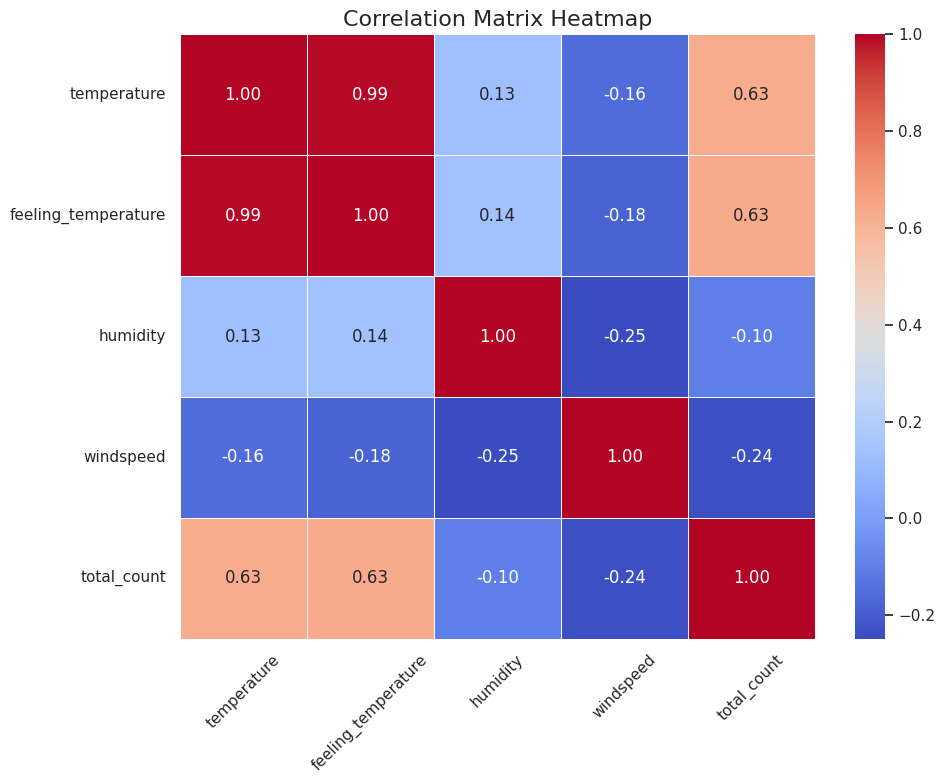

In [359]:
# Generating a heatmap to visualize the correlation matrix of numerical columns in the DataFrame
df_heatmap = df_clean[numerical_columns]
multivariate_analysis = MultivariateAnalysis(df_heatmap)
multivariate_analysis.heatmap()

## Observation:
 
 1. **windspeed**:
    -  Weak negative correlations with humidity,number of bikes rented, indicating some association but not particularly strong.

 2. **humidity**:
    -  Weak correlation with windspeed.

 3. **feeling_temperature**:
    -  Very High positive correlation with temperature. 

 4. **temperature**:
    -  Very High positive correlation with atemp(Feeling Temperature), and moderate correlation and number of bikes rented.
    -  
 5. **total Count:** Weak positive correlation with temperature and feeling temperature.

## Modelling 

## Pre-processing Steps

## Code of Converting the categorical variables : Binaries to 0 and 1

In [360]:
# Converting the categorical variables : Binaries to 0 and 1
binary_categorical_columns = ['is_holiday','is_workingday']
year_categorical_columns = ['year']
categorical_values(df_clean, binary_categorical_columns)

print("\n Converting the categorical variables : Binaries to 0 and 1 ...")
df_clean[binary_categorical_columns] = df_clean[binary_categorical_columns].apply(lambda x: x.map({'True':1, 'False':0}))
df_clean[year_categorical_columns] = df_clean[year_categorical_columns].apply(lambda x: x.map({'2018':0, '2019':1}))

Value,Count
False,709
True,21


Value,Count
True,499
False,231



 Converting the categorical variables : Binaries to 0 and 1 ...


## Test

In [361]:
df_clean.head()

,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temperature,feeling_temperature,humidity,windspeed,total_count
0,Spring,0,January,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variable Creation (One Hot Encoding)

In [362]:
## Finding columns which needs dummy variable creation
categ_column = []
for i in df_clean.columns:
    if len(df_clean[i].unique()) > 2 and df_clean[i].dtype=='object':
        categ_column.append(i)

print('Categorical columns which need one hot encoding')
print(categ_column)



Categorical columns which need one hot encoding
['season', 'month', 'weekday', 'weather_condition']


In [363]:
dummy_data = pd.get_dummies(data=df_clean[categ_column],dtype=int, drop_first=True)
df_clean = pd.concat([df_clean, dummy_data], axis=1)
df_clean = df_clean.drop(columns=categ_column, axis=1)

##### Test

In [364]:
# Test the encoding for categorical columns 
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   year                                 730 non-null    int64  
 1   is_holiday                           730 non-null    int64  
 2   is_workingday                        730 non-null    int64  
 3   temperature                          730 non-null    float64
 4   feeling_temperature                  730 non-null    float64
 5   humidity                             730 non-null    float64
 6   windspeed                            730 non-null    float64
 7   total_count                          730 non-null    int64  
 8   season_Spring                        730 non-null    int32  
 9   season_Summer                        730 non-null    int32  
 10  season_Winter                        730 non-null    int32  
 11  month_August                    

,year,is_holiday,is_workingday,temperature,feeling_temperature,humidity,windspeed,total_count,season_Spring,season_Summer,season_Winter,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weather_condition_Light Snow & Rain,weather_condition_Mist & Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Train-Test Split

In [365]:
#splitting the data into 70-30
df_train,df_test = train_test_split(df_clean,test_size=0.3,random_state=100)

## Test

In [366]:
# Shape of the training data
print("Shape of Train Data : ", df_train.shape)

# Shape of the test data
print("Shape of Test Data : ", df_test.shape)

Shape of Train Data :  (511, 30)
Shape of Test Data :  (219, 30)


# Scaling

## Here we will be using min max scaling

##### Code

In [367]:
# Instantiate an object to scale only numerical variables that are not encoded
scaler = MinMaxScaler()

# Numerical variables that require scaling
print("Numerical Columns : ",numerical_columns)

# Fit on the data
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])

Numerical Columns :  ['temperature', 'feeling_temperature', 'humidity', 'windspeed', 'total_count']


##### Test

In [368]:
#max 1 and min 0
df_train.describe()

,year,is_holiday,is_workingday,temperature,feeling_temperature,humidity,windspeed,total_count,season_Spring,season_Summer,season_Winter,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weather_condition_Light Snow & Rain,weather_condition_Mist & Cloudy
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844,0.514186,0.242661,0.246575,0.248532,0.095890,0.084149,0.066536,0.088063,0.076321,0.076321,0.097847,0.084149,0.086106,0.086106,0.080235,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513,0.029354,0.344423
std,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639,0.224737,0.429112,0.431440,0.432585,0.294729,0.277883,0.249461,0.283664,0.265771,0.265771,0.297399,0.277883,0.280795,0.280795,0.271923,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579,0.168963,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.356765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.519673,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.688737,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Selection

##### First we will go with manual selection so plotting correlation matrix gives best feel about the correlation of the data

In [369]:
df_train.shape

(511, 30)

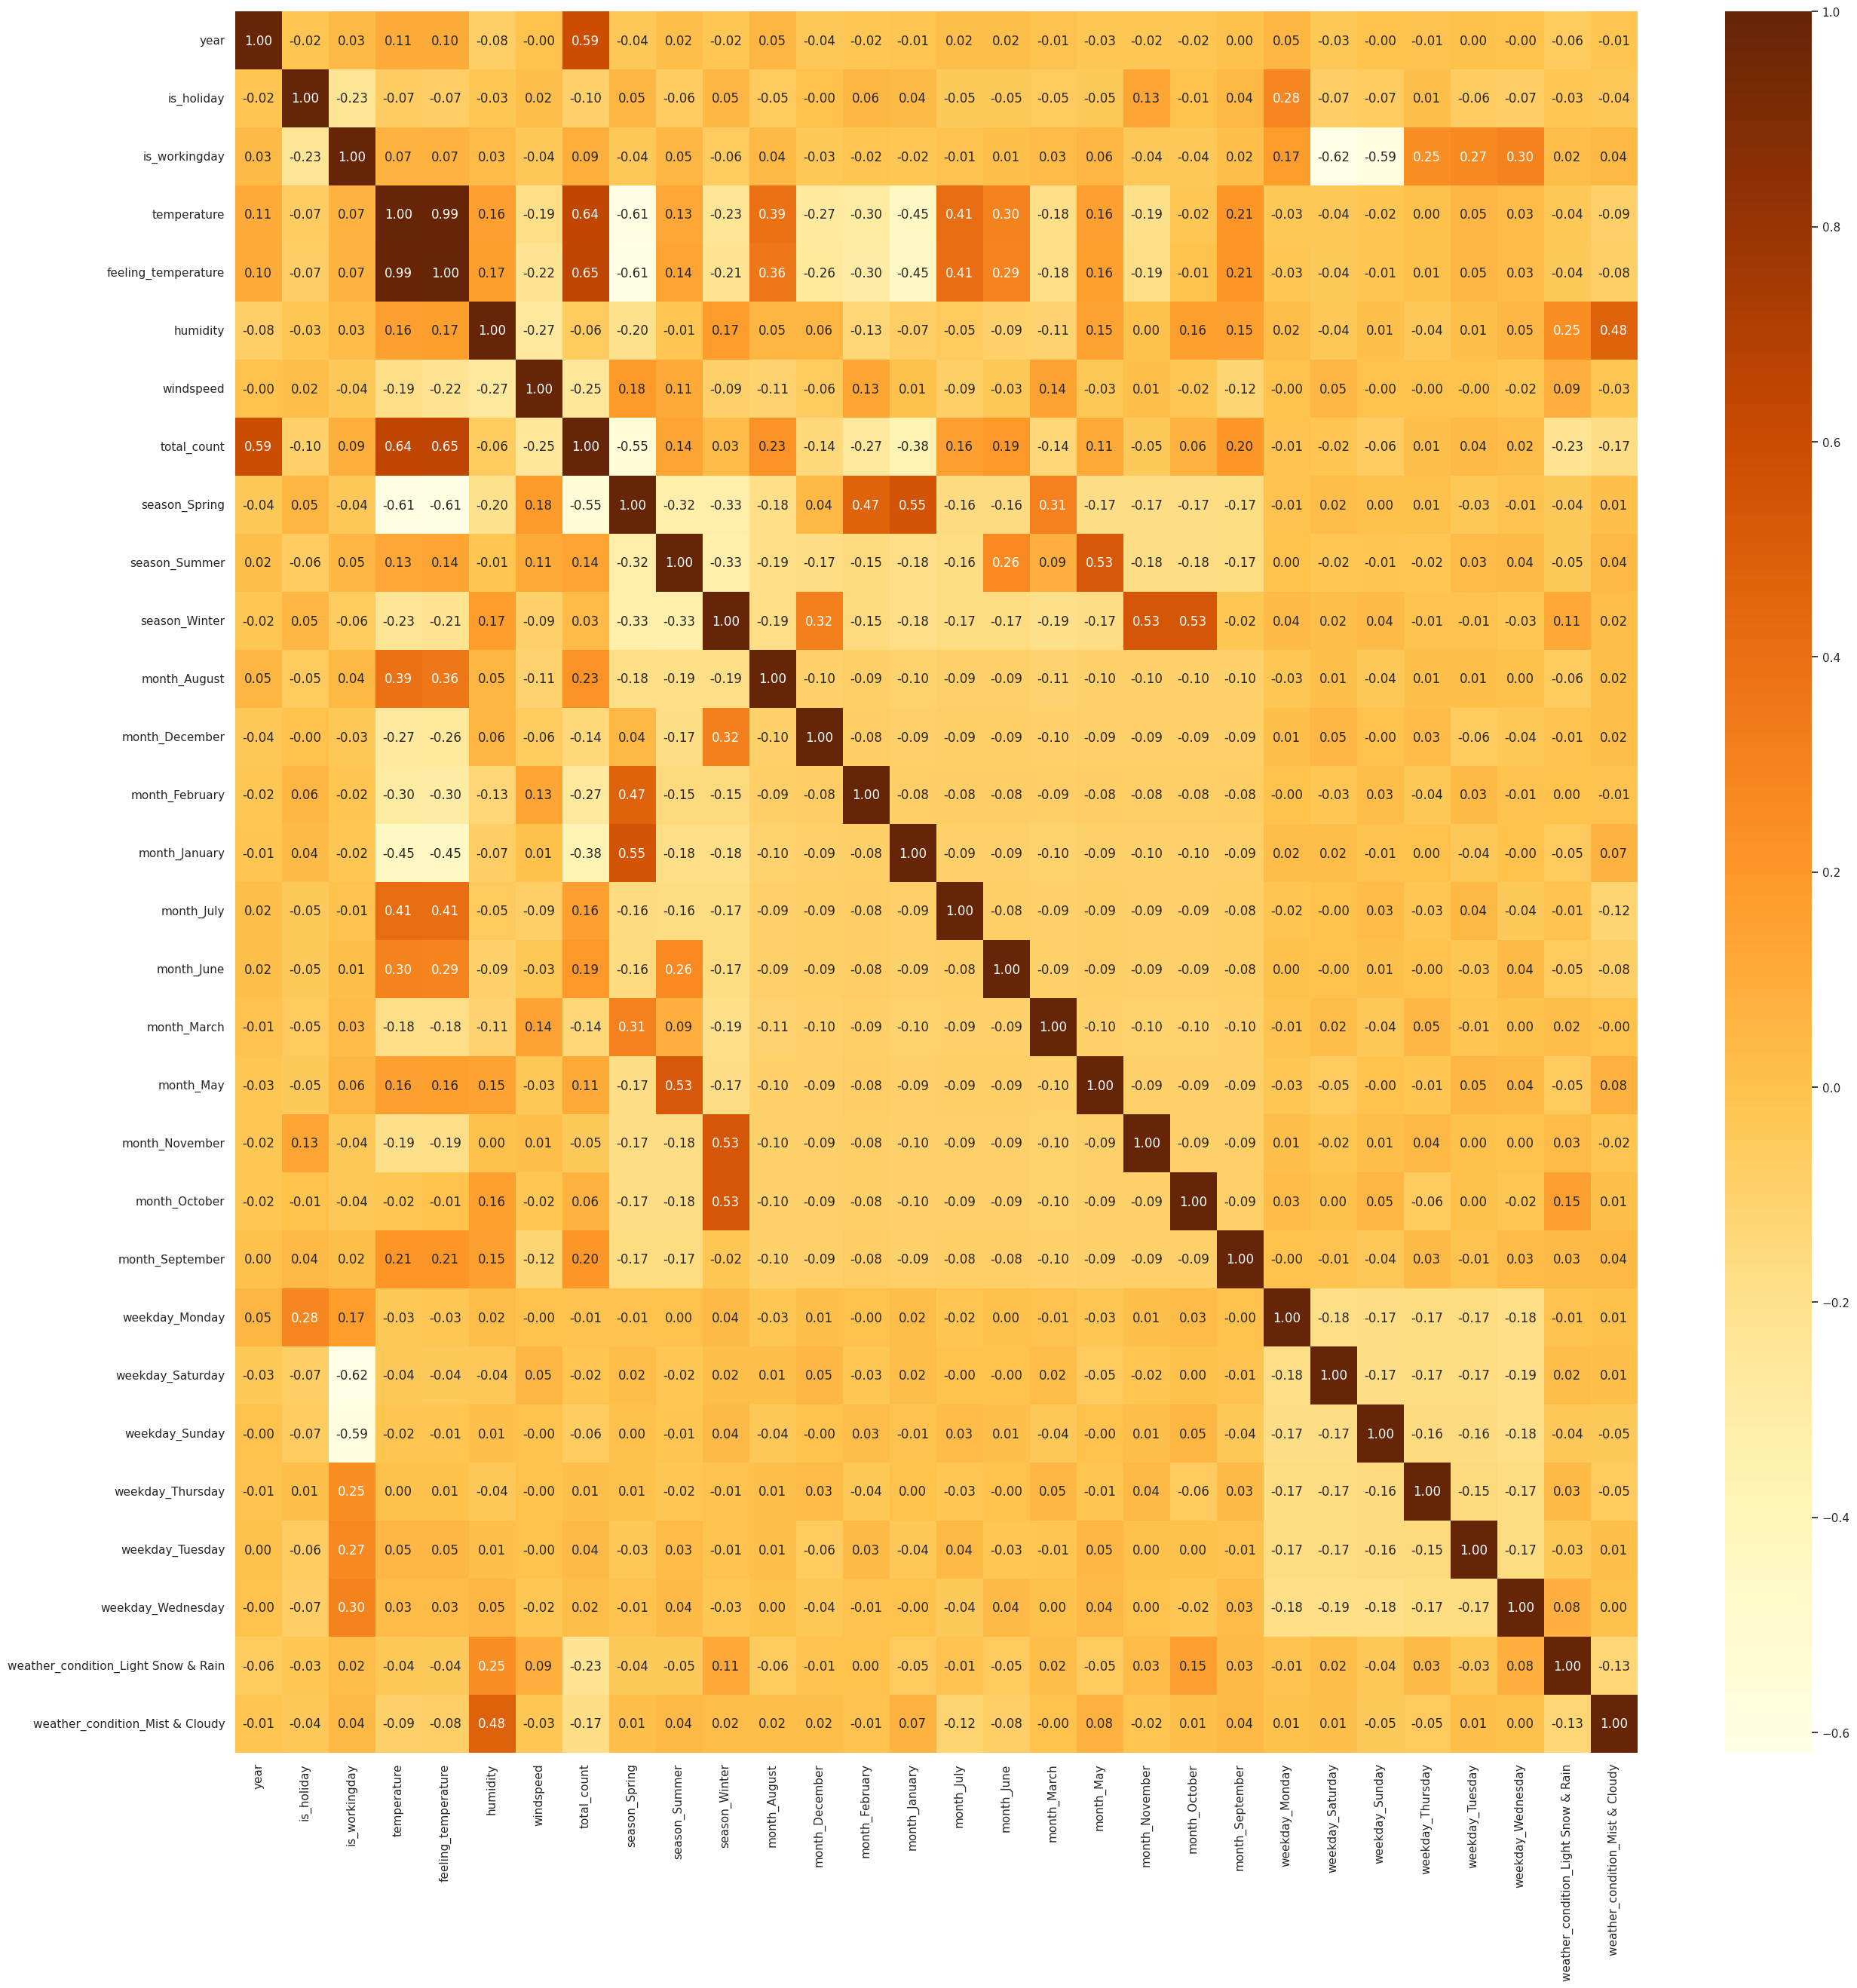

In [370]:
plt.figure(figsize= [30,30])
sns.heatmap(df_train.corr() , annot= True ,cmap = 'YlOrBr', fmt='.2f')
plt.show()

## Inferences
1) Strong Positive Correlation :-
    1) Temperature and Feeling Temperature (0.99)
    2) Total Count and Tempearture (0.64)
    3) Total Count and Feeling Temperature (0.65)
    4) Total Count and Year(0.59)
2) Moderate Positive Correlation
    1) Humidity and weather condition Mist and Cloudy(0.48)
    2) Some Months and their corresponding seasons. For e.g Month May and season Summer (0.53)
3) Strong Negative Correlation
    1) Weekends (Saturday and Sunday) and is_workingday (~0.6)
    2) Season Spring and Total Counter (-0.55) Less bikes ridden on spring time
    3) Temperature and Feeling Temperature and Spring Season (-0.61)
4) Moderate Negative Correlation
    1) Tempearture and January Month (-0.41)
    2) Feeling Tempearture and January Month (-0.41)  

## Now that we have some idea of the correlation we will build the x_train and y_train with y_train as the target variable. 
## The Target Variable is total_count 

In [371]:
# Calculate the X_train and Y_train
y_train = df_train.pop('total_count')
X_train = df_train

##### Test

In [372]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: total_count, dtype: float64

In [373]:
X_train.head()

,year,is_holiday,is_workingday,temperature,feeling_temperature,humidity,windspeed,season_Spring,season_Summer,season_Winter,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weather_condition_Light Snow & Rain,weather_condition_Mist & Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


## Model Building

1) Initially we are going to build a model and using p-value and VIF we are going to a Backward process by eliminating predictor variables.
2) Find n number of predictor variables using RFE Selector  and compare the two models

In [374]:
# Initial Model Summary with all columns
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(np.array(y_train) , X_train_sm)
lm_model = lr.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.68
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          8.86e-181
Time:                        01:24:43   Log-Likelihood:                 527.68
No. Observations:                 511   AIC:                            -997.4
Df Residuals:                     482   BIC:                            -874.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                               -9.263e+11   6.88e+11     -1.345      0.179   -2.28e+12    4.26e+11
year                                    0.2328      0.008     28.819      0.000       0.217       0.249
is_holiday                           9.263e+11   6.88e+11      1.345      0.179   -4.26e+11    2.28e+12
is_workingday                        9.263e+11   6.88e+11      1.345      0.179   -4.26e+11    2.28e+12
temperature                             0.3877      0.142      2.723      0.007       0.108       0.668
feeling_temperature                     0.0578      0.139      0.417      0.677      -0.214       0.330
humidity                               -0.1525      0.039     -3.948      0.000      -0.228      -0.077
windspeed                              -0.1835      0.026     -6.952      0.000      -0.235      -0.132
season_Spring                          -0.0454      0.030     -1.511      0.131      -0.104       0.014
season_Summer                           0.0419      0.026      1.598      0.111      -0.010       0.093
season_Winter                           0.1071      0.028      3.824      0.000       0.052       0.162
month_August                            0.0228      0.034      0.672      0.502      -0.044       0.089
month_December                         -0.0443      0.034     -1.315      0.189      -0.110       0.022
month_February                         -0.0326      0.033     -0.987      0.324      -0.097       0.032
month_January                          -0.0633      0.034     -1.882      0.060      -0.129       0.003
month_July                             -0.0327      0.035     -0.932      0.352      -0.102       0.036
month_June                              0.0063      0.025      0.252      0.801      -0.043       0.055
month_March                             0.0019      0.025      0.077      0.939      -0.046       0.050
month_May                               0.0257      0.021      1.216      0.225      -0.016       0.067
month_November                         -0.0398      0.036     -1.091      0.276      -0.111       0.032
month_October                           0.0074      0.036      0.206      0.837      -0.063       0.078
month_September                         0.0867      0.032      2.706      0.007       0.024       0.150
weekday_Monday                         -0.0215      0.015     -1.391      0.165      -0.052       0.009
weekday_Saturday                     9.263e+11   6.88e+11      1.345      0.179   -4.26e+11    2.28e+12
weekday_Sunday                       9.263e+11   6.88e+11      1.345      0.179   -4.26e+11    2.28e+12
weekday_Thursday                       -0.0095      0.016     -0.607      0.544      -0.040       0.021
weekday_Tuesday                        -0.0184      0.016     -1.17

In [375]:
## VIF of Initial Model
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,0.000000
1,year,1.055130
2,is_holiday,inf
3,is_workingday,inf
4,temperature,66.228731
5,feeling_temperature,55.669705
6,humidity,2.049727
7,windspeed,1.299361
8,season_Spring,10.770228
9,season_Summer,8.296748


Recursive feature elimination as there are many variables so we will use RFE Technique to enable autmation of removal multicollinear feature.

In [376]:
#  Running RFE with an arbitary number of  variables 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [377]:
#Print Target Variables which have RFE Support
selected_features=X_train.columns[rfe.support_]
print(selected_features)

Index(['year', 'is_holiday', 'is_workingday', 'temperature', 'humidity',
       'windspeed', 'season_Spring', 'season_Summer', 'season_Winter',
       'month_July', 'month_September', 'weekday_Saturday', 'weekday_Sunday',
       'weather_condition_Light Snow & Rain',
       'weather_condition_Mist & Cloudy'],
      dtype='object')


#### Now consider the training model with only columns having RFE Support

In [378]:
X_train= X_train.loc[:,X_train.columns[rfe.support_]]

In [379]:
X_train.shape

(511, 15)

## Model 2 -- Model with RFE Columns (No of target Variables 15)

In [380]:
#Build model with RFE Columns
X_train_sm2 = sm.add_constant(X_train)
lr = sm.OLS(np.array(y_train) , X_train_sm2)
lm_model2 = lr.fit()
print(lm_model2.summary())

## VIF of model with RFE Columns
vif_data2=pd.DataFrame()
vif_data2["Feature"]=X_train_sm2.columns

vif_data2["VIF"]=[variance_inflation_factor(X_train_sm2.values,i) 
                 for i in range(len(X_train_sm2.columns))]
vif_data2



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.26e-190
Time:                        01:25:03   Log-Likelihood:                 515.10
No. Observations:                 511   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -936.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

,Feature,VIF
0,const,0.000000
1,year,1.033809
2,is_holiday,inf
3,is_workingday,inf
4,temperature,3.615061
5,humidity,1.903850
6,windspeed,1.195992
7,season_Spring,5.021185
8,season_Summer,2.623418
9,season_Winter,3.485751


## Inference

1) High Collinearity between weekday saturday and weekday sunday and is holiday and is working day so for model 3 we will be eliminating one of 

## Model 3

##### Dropping the weekday_Saturday target variable from the model

In [381]:
# Dropping the predictor variable `weekday_Saturday` because of its infinite VIF.
predictor = ['weekday_Saturday']
X_train_sm3 = X_train_sm2.drop(predictor, axis = 1)
lr = sm.OLS(np.array(y_train) , X_train_sm3)
lm_model3 = lr.fit()
print(lm_model3.summary())

#calculate the VIF 
vif_data3=pd.DataFrame()
vif_data3["Feature"]=X_train_sm3.columns

vif_data3["VIF"]=[variance_inflation_factor(X_train_sm3.values,i) 
                 for i in range(len(X_train_sm3.columns))]
vif_data3

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          7.31e-192
Time:                        01:25:10   Log-Likelihood:                 518.04
No. Observations:                 511   AIC:                            -1006.
Df Residuals:                     496   BIC:                            -942.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

,Feature,VIF
0,const,78.902788
1,year,1.035215
2,is_holiday,1.149716
3,is_workingday,1.751639
4,temperature,3.615446
5,humidity,1.906795
6,windspeed,1.196046
7,season_Spring,5.021533
8,season_Summer,2.623422
9,season_Winter,3.495427


## Model 4

##### Dropping the season_Spring target variable from the model

In [382]:
# Dropping the predictor variable `season_Spring` because of its high VIF >5
predictor = ['season_Spring']
X_train_sm4 = X_train_sm3.drop(predictor, axis = 1)
lr = sm.OLS(np.array(y_train) , X_train_sm4)
lm_model4 = lr.fit()
print(lm_model4.summary())

#calculate the VIF 
vif_data4=pd.DataFrame()
vif_data4["Feature"]=X_train_sm4.columns

vif_data4["VIF"]=[variance_inflation_factor(X_train_sm4.values,i) 
                 for i in range(len(X_train_sm4.columns))]
vif_data4

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.72e-191
Time:                        01:31:32   Log-Likelihood:                 514.37
No. Observations:                 511   AIC:                            -1001.
Df Residuals:                     497   BIC:                            -941.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

,Feature,VIF
0,const,49.384623
1,year,1.030918
2,is_holiday,1.148865
3,is_workingday,1.751623
4,temperature,1.604383
5,humidity,1.882878
6,windspeed,1.183010
7,season_Summer,1.330257
8,season_Winter,1.288511
9,month_July,1.433382


## Residual Analysis

Checking if the error_terms are also normally distributed. Doing this by plotting a histogram for the error_terms

In [383]:
# Predicting the y_train using the final_model `lm_model_4`
y_train_pred = lm_model4.predict(X_train_sm4)

<AxesSubplot:ylabel='Density'>

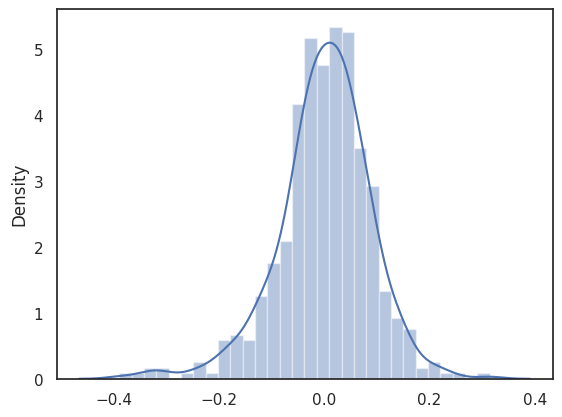

In [384]:
# Calculate the residual which is y_train - y_train_pred and then plot it in histogram
res = y_train - y_train_pred
sns.distplot(res)

## Inference

Error Terms is normall distributed and the mean is centred around zero

# Predictions and evaluations on the Test Set

In [386]:
print("Numerical Columns : ",numerical_columns)

# Fit on the data
df_test[numerical_columns] = scaler.transform(df_test[numerical_columns])

Numerical Columns :  ['temperature', 'feeling_temperature', 'humidity', 'windspeed', 'total_count']


# Test

In [387]:
#Check whether the the minmax scaling has been applied on the test set
df_test.describe()

,year,is_holiday,is_workingday,temperature,feeling_temperature,humidity,windspeed,total_count,season_Spring,season_Summer,season_Winter,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weather_condition_Light Snow & Rain,weather_condition_Mist & Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [402]:
# Finding the target variables which we finalized for our train set
predictor_vars = [i for i in X_train_sm4.columns]
# Removoving Constant from the training set
predictor_vars.pop(0)
print('Final Predictor variables of the final train set',predictor_vars)

Final Predictor variables of the final train set ['year', 'is_holiday', 'is_workingday', 'temperature', 'humidity', 'windspeed', 'season_Summer', 'season_Winter', 'month_July', 'month_September', 'weekday_Sunday', 'weather_condition_Light Snow & Rain', 'weather_condition_Mist & Cloudy']


In [399]:
# Calculate the X_test and Y_test
y_test = df_test.pop('total_count')
X_test = df_test[predictor_vars]
X_test.head()

,year,is_holiday,is_workingday,temperature,humidity,windspeed,season_Summer,season_Winter,month_July,month_September,weekday_Sunday,weather_condition_Light Snow & Rain,weather_condition_Mist & Cloudy
184,0,1,0,0.831783,0.657364,0.084219,0,0,1,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,1,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,1,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,1,0,0,0,0,0,0


In [400]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: total_count, dtype: float64

# Test

In [405]:
X_test.shape

(219, 13)

In [406]:
# add constant 
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,year,is_holiday,is_workingday,temperature,humidity,windspeed,season_Summer,season_Winter,month_July,month_September,weekday_Sunday,weather_condition_Light Snow & Rain,weather_condition_Mist & Cloudy
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,1,0,0,0,1
535,1.0,1,0,1,0.901354,0.610133,0.153728,1,0,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,1,0,0,0,0,1
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,1,0,0,0,0,0,0


In [407]:
# predict
y_test_pred = lm_model4.predict(X_test_sm)

# Evaluate the Test Model

#### Calculating the R-squared score on the test set

In [409]:
# Calculating the R-squared score on the test set
r2 = r2_score(y_true=y_train, y_pred=y_train_pred)
print ("r2_score value of train set : ", round(r2,4))
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
print ("r2_score value of test set : ", round(r2,4))

r2_score value of train set :  0.8449
r2_score value of test set :  0.8065


We can see that the r2_score on the test set is 0.806 and the r-r2_score on the trained set 0.844 which is quiet reasonable and nearly equal, which means that data used to train the model has been able to apply those learnings over the test data.

# Plotting y_test and y_pred to understand the spread

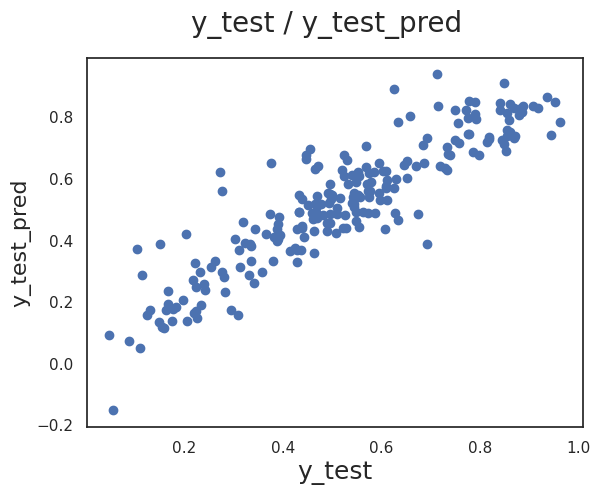

In [410]:
# Code
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test / y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

In [412]:
print(round(lm_model4.params,3))

const                                  0.235
year                                   0.229
is_holiday                            -0.114
is_workingday                         -0.010
temperature                            0.595
humidity                              -0.173
windspeed                             -0.188
season_Summer                          0.082
season_Winter                          0.137
month_July                            -0.046
month_September                        0.094
weekday_Sunday                        -0.053
weather_condition_Light Snow & Rain   -0.240
weather_condition_Mist & Cloudy       -0.054
dtype: float64


### The equation of best fitted line is:

$total_count = 0.235 + 0.229 * year -0.114 * is_holiday -0.010 *is_workingday  + 0.595 * temperature -0.173 * humidity - -0.188 * windspeed - 0.082 * season_Summer + 0.137 * season_Winter -0.046 * month_July - 0.0694 * month_July + 0.094 * month_September -0.053 * weekday_Sunday -0.240 * weather_condition_Light Snow & Rain -0.054 * weather_condition_Mist & Cloudy 

In [413]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print("Adjusted-R2 value for the test dataset : ", adjusted_r2)

Adjusted-R2 value for the test dataset :  0.7942


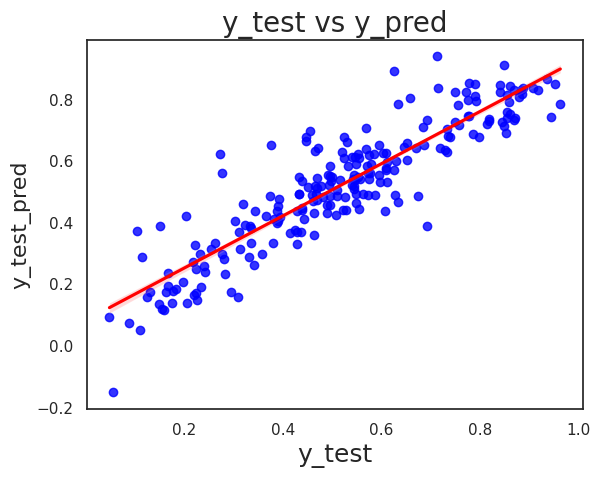

In [414]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

### Model Summary:
1. **Model Fit:**
   - **R-squared (Train):** 0.845
   - **Adjusted R-squared (Train):** 0.841
   - **R-squared (Test):** 0.8065
   - **Adjusted R-squared (Test):** 0.7942

The slight decrease in the test R-squared suggests a good generalization with minimal overfitting.

2. **Model Statistics:**
   - **F-statistic:** 196.2 (with a p-value of 1.72e-191)

   The F-statistic indicates that the model is statistically significant, meaning that the predictor variables, taken together, significantly predict the dependent variable.

### Coefficients:
All predictor variables are statistically significant (p < 0.05).

### Multicollinearity:
- **VIF Values:** All below 5, with the highest VIF for humidity (1.88) suggesting that multicollinearity is not a concern in this model.

In [415]:
print(round(lm_model4.params,3))

const                                  0.235
year                                   0.229
is_holiday                            -0.114
is_workingday                         -0.010
temperature                            0.595
humidity                              -0.173
windspeed                             -0.188
season_Summer                          0.082
season_Winter                          0.137
month_July                            -0.046
month_September                        0.094
weekday_Sunday                        -0.053
weather_condition_Light Snow & Rain   -0.240
weather_condition_Mist & Cloudy       -0.054
dtype: float64


### Relation with Bikes Ridden:

- **Warm Weather:** People like biking when it's warm. (Postive Trend)
- **Wind:** People don't like biking when it's windy. (Negative Trend)
- **Humidity** People  don't like biking when it's Humid. (Negative Trend)
- **Light Snow & Rain** People avoid biking (Negative Trend)
- **Mist & Cloudy** People avoid biking (Negative Trend)
- **Summer:** People might go for biking. (Positive Trend)
- **Winter:** People prefer biking more in Winter than in Summer.
- **July:** Biking goes down (Negative Trend).
- **September:** More biking happens here.(Positive Trend)
- **Holidays:** Biking goes down (Negative Trend).People are using more for official purposes.
- **workingday** Biking goes down (Negative Trend).People are using more for official purposes.
- **Year:** Biking is getting more popular over time. Even during pandemic noticed a surge in bikes ridden.

### Suggestions:

- **Weather :** Promote Biking using discounts for days when its cloudy/windy.
  
- **Seasons:** Focus on biking in Summer than in Winter.
  
- **Month:** Give monthly discounts for the months of July.

- **Holiday:** Include more docks that connects vacation spots.